# Sistech Portfolio Program 2024
Our team:
1. Maryesta Apriliani S.
2. Arini Maharani


Penjelasan 'dataframe' di akhir code:


```
reviewer_name	Nama penulis teks review (censored)
content	Teks review dari pelanggan
score	Penilaian yang diberikan
thumbsUpCount	Jumlah like
sentiment	Sentimen review
category	Kategori Review
tags	Tags dari review text
review_date	Tanggal review
review_time	Waktu review
appVersion	Versi aplikasi yang digunakan saat menulis review
replyContent	Balasan terhadap review dari Ruangguru
reply_date	Tanggal balasan terhadap review
reply_time	Waktu balasan terhadap review
review_datetime: Tanggal dan waktu review. contoh: 2024-05-14 08:41:48
reply_datetime: Tanggal dan waktu balasan terhadap review. contoh: 2024-05-14 08:41:48
response_time: waktu hingga suatu review di reply. contoh: 1583 days +01:11:30
response_time_hours: waktu hingga suatu review di reply (dalam jam). contoh: 176.152222
response_time_category: Kategori waktu balasan (Updated Review, Quick, Moderate, Slow).
"Masalah Teknis": [
        'Masalah', 'Bugs', 'Loading', 'Koneksi', 'Crash', 'Error', 'Eror', 'Lemot', 'Server Error', 'Spam'
    ],
"Fitur Aplikasi": [
        'Fitur', 'feature', 'Robo', 'Guru', 'robo guru', 'Aplikasi', 'Kelas', 'Pembayaran', 'Premium', 'Langganan', 'Notifikasi'
    ],
"Konten Pembelajaran": [
        'Pembelajaran', 'Pelajaran', 'Materi', 'Tryout', 'Quiz', 'Kurikulum', 'Video', 'Animasi', 'Pembahasan', 'Konten', 'Mata Pelajaran', 'Penjelasan'
    ],
"Pembayaran dan Harga": [
        'Pembayaran', 'Langganan', 'Refund', 'Harga', 'Promo', 'Diskon', 'Cashback', 'Paket Belajar'
    ],
"Antarmuka Pengguna": [
        'Tampilan', 'Desain', 'UI', 'UX', 'Navigasi', 'User Interface', 'User Experience', 'Animasi'
    ],"Lainnya": [
        'Keren', 'Bagus', 'Kualitas', 'Komentar', 'Rekomendasi', 'Pujian', 'Makasih', 'Harga', 'Bonus', 'Hadiah'
    ]

```



# *Import Dependency* & Data

In [35]:
!pip install pandas openpyxl

In [36]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import ast
import re
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
import nltk
nltk.download('stopwords')
#from googletrans import Translator
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
!gdown 1xK-HjkL8vM3sSzUwa2JVHo2b4rklinEvz9TKtba_1kw
# https://docs.google.com/spreadsheets/d/1xK-HjkL8vM3sSzUwa2JVHo2b4rklinEvz9TKtba_1kw/edit?usp=drive_link
file_name = 'Google Play Reviews - Ruangguru.xlsx'
dataframe = pd.read_excel(file_name, sheet_name= 'Google Play Review')

Downloading...
From (original): https://drive.google.com/uc?id=1xK-HjkL8vM3sSzUwa2JVHo2b4rklinEvz9TKtba_1kw
From (redirected): https://docs.google.com/spreadsheets/d/1xK-HjkL8vM3sSzUwa2JVHo2b4rklinEvz9TKtba_1kw/export?format=xlsx
To: /content/Google Play Reviews - Ruangguru.xlsx
611kB [00:00, 4.29MB/s]


# 2. Data *Cleaning*

## Data Profiling

In [38]:
dataframe.head()

,reviewer_name,content,score,thumbsUpCount,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Customer Service"", ""L...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25
1,gTk2Mq5Plg_bkc4AOdaq,Sangat bagus untuk belajar ku setiap hari,5,0,Positive,Compliments,"[""Aplikasi"", ""Koneksi"", ""Pembelajaran""]",2024-06-13,07:58:40,6.79.1,Makasih ya Angel atas apresiasinya. Seneng ban...,2024-06-13,13:13:59
2,gTk2gkGjeHd1SMHZy2JR,Sangat membantu menambah wawasa untuk belajar ...,5,0,Positive,Compliments,"[""Pembelajaran""]",2024-06-13,02:59:57,NaN,Makasih Herna udah kasih bintang 5. Kami senan...,2024-06-13,13:12:04
3,gTk24MO2t9HGH_4QoCCm,👍👍👍👍👍👍👍👍👍,5,0,Positive,Compliments,[],2024-06-12,21:30:46,6.79.1,Thanks Ghea atas bintang 5-nya. Seneng deh Apl...,2024-06-13,13:06:40
4,gTk2aWCCbjijVSH5M77K,"Sangat membantu dalam pembelajaran, recommeded",4,0,Positive,Compliments,"[""Pembelajaran""]",2024-06-12,19:04:55,NaN,Makasih Waode udah kasih kepercayaan ke Aplika...,2024-06-13,13:04:12


In [39]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewer_name  4180 non-null   object        
 1   content        4180 non-null   object        
 2   score          4180 non-null   int64         
 3   thumbsUpCount  4180 non-null   int64         
 4   sentiment      4180 non-null   object        
 5   category       4180 non-null   object        
 6   tags           4180 non-null   object        
 7   review_date    4180 non-null   datetime64[ns]
 8   review_time    4180 non-null   object        
 9   appVersion     2772 non-null   object        
 10  replyContent   4130 non-null   object        
 11  reply_date     4130 non-null   datetime64[ns]
 12  reply_time     4130 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 424.7+ KB


## Deteksi Duplikasi

In [40]:
duplicates = dataframe.duplicated()
num_duplicates = duplicates.sum()
print(f'Jumlah baris yang duplikat: {num_duplicates}')

Jumlah baris yang duplikat: 0


Tidak ada duplikasi

## Deteksi Anomali

In [41]:
print(dataframe.score.unique())
print(dataframe.sentiment.unique())
print(dataframe.category.unique())
print(dataframe.appVersion.unique())

[5 4 3 2 1]
['Positive' 'Neutral' 'Negative']
['Compliments' 'Suggestions' 'Others' 'Complaints' 'Critics' 'Questions']
['6.79.1' nan '6.78.1' '6.38.1' '5.0.3' '6.75.0' '6.77.0' '5.10.1'
 '6.73.0' '6.74.0' '3.1.9' '6.78.0' '6.68.1' '6.66.0' '6.67.1' '5.0.4'
 '6.69.0' '6.28.2' '6.76.2' '6.46.1' '6.55.0' '6.20.1' '6.22.0' '6.76.1'
 '6.76.0' '6.70.1' '6.72.0' '6.71.0' '6.49.0' '6.28.1' '6.62.0' '6.10.0'
 '6.3.0' '6.45.0' '6.68.0' '6.52.0' '6.57.0' '6.47.0' '6.58.0' '6.53.0'
 '4.6.4' '6.19.1' '6.67.0' '6.27.0' '6.65.0' '6.35.2' '6.39.0' '6.72.1'
 '6.23.3' '6.63.0' '6.64.0' '6.42.0' '6.33.2' '6.61.0' '6.51.0' '6.64.1'
 '6.70.0' '5.1.1' '6.26.0' '6.64.2' '6.54.0' '6.2.1' '4.5.2' '5.9.1'
 '4.5.3' '6.59.0' '6.50.0' '4.11.2' '6.38.0' '6.30.0' '6.41.0' '3.1.4'
 '5.1.2' '6.45.1' '6.48.0' '6.56.0' '6.22.1' '6.43.0' '6.32.0' '6.12.0'
 '6.60.0' '5.11.1' '4.10.2' '4.7.3' '5.6.1' '5.1.0' '5.8.2' '4.6.0'
 '6.20.4' '6.15.0']


In [42]:
dataframe.describe()

,score,thumbsUpCount,review_date,reply_date
count,4180.000000,4180.000000,4180,4130
mean,4.103349,3.469856,2023-08-26 23:25:33.014354176,2023-08-16 11:26:10.750605056
min,1.000000,0.000000,2023-01-01 00:00:00,2018-10-04 00:00:00
25%,4.000000,0.000000,2023-04-16 00:00:00,2023-04-09 00:00:00
50%,5.000000,0.000000,2023-08-08 00:00:00,2023-08-07 00:00:00
75%,5.000000,0.000000,2024-01-03 00:00:00,2024-01-04 00:00:00
max,5.000000,813.000000,2024-06-13 00:00:00,2024-06-13 00:00:00
std,1.501324,28.623302,NaN,NaN


Pada bagian ini, sekilas terlihat tidak terdapat anomali. Namun, pada bagian selanjutnya akan diketahui pada kolom reply_date terdapat anomali (reply_date terjadi lebih dahulu dibanding review_date)

## Penanganan Data Hilang/*Missing Value*

Terdapat beberapa metode dalam menangani data hilang:

Removal: Melakukan penghilangan beberapa baris dan/atau kolom secara penuh

Imputation: Melakukan penggantian nilai hilang dengan nilai lain yang dirasa mengandung galat rendah

### Removal

In [43]:
dataframe.isnull().mean() * 100

reviewer_name     0.000000
content           0.000000
score             0.000000
thumbsUpCount     0.000000
sentiment         0.000000
category          0.000000
tags              0.000000
review_date       0.000000
review_time       0.000000
appVersion       33.684211
replyContent      1.196172
reply_date        1.196172
reply_time        1.196172
dtype: float64

Persentase *missing value* dari setiap variabel < 70%. Tidak ada kolom yang dihapus. Pada bagian tags, sebenarnya terdapat missing value, tetapi di sini tertulis 0% karena dalam bentuk string seperti [], []., [[]]

### *Imputation*

#### appVersion

Pada variabel 'appVersion' terdapat 33.68% *missing value*

Ide imputasi: nilai appVersion yang hilang akan diisi dengan modus dari appVersion dari tiga hari (hari itu, hari sebelumnya, dan hari sesudahnya)

In [44]:
# Fungsi untuk imputasi appVersion
def impute_app_version(row):
    # Ambil tanggal review
    review_date = row['review_date']

    # Cari modus appVersion pada hari itu, hari sebelumnya, dan hari sesudahnya
    combined_modes = pd.concat([
        dataframe[dataframe['review_date'] == pd.to_datetime(review_date)]['appVersion'],
        dataframe[dataframe['review_date'] == pd.to_datetime(review_date) - pd.Timedelta(days=1)]['appVersion'],
        dataframe[dataframe['review_date'] == pd.to_datetime(review_date) + pd.Timedelta(days=1)]['appVersion']
    ]).mode()

    # Jika modus ditemukan, kembalikan modus pertama
    if not combined_modes.empty:
        return combined_modes[0]
    else:
        return row['appVersion']

# Imputasi appVersion dengan fungsi yang dibuat
dataframe['appVersion'] = dataframe.apply(impute_app_version, axis=1)

print(f"Missing values in appVersion: {dataframe['appVersion'].isnull().sum()}")

Missing values in appVersion: 0


#### replyContent

Ide: Isi dengan empty string

In [45]:
# Fill missing values in reply content with empty string
dataframe['replyContent'].fillna('', inplace=True)
print(f"Missing values in replyContent: {dataframe['replyContent'].isnull().sum()}")

Missing values in replyContent: 0


#### reply_date dan reply_time

Ide: Imputasi reply_date dan reply_time dengan informasi dari lamanya waktu hingga membalas review (selisih waktu review dan reply)

##### Ditemukan Anomali dan Penambahan 3 Kolom

Akan divisualisasikan. Dilakukan penambahan 4 kolom terlebih dahulu, yakni:



```
review_datetime: Tanggal dan waktu review. contoh: 2024-05-14 08:41:48

reply_datetime: Tanggal dan waktu balasan terhadap review. contoh: 2024-05-14 08:41:48

response_time: waktu hingga suatu review di reply. contoh: 1583 days +01:11:30

response_time_hours: waktu hingga suatu review di reply (dalam jam). contoh: 176.152222
```



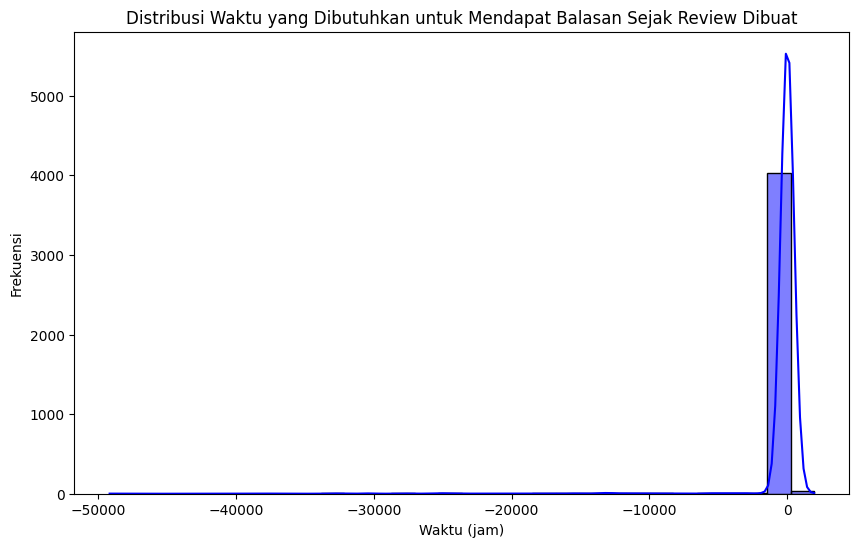

In [46]:
# Mengonversi kolom review_date, review_time, reply_date, dan reply_time menjadi datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])
dataframe['review_time'] = dataframe['review_time'].astype(str)
dataframe['reply_date'] = pd.to_datetime(dataframe['reply_date'])
dataframe['reply_time'] = dataframe['reply_time'].astype(str)

# Membuat kolom review_datetime dan reply_datetime
dataframe['review_datetime'] = pd.to_datetime(dataframe['review_date'].dt.strftime('%Y-%m-%d') + ' ' + dataframe['review_time'])
dataframe['reply_datetime'] = pd.to_datetime(dataframe['reply_date'].dt.strftime('%Y-%m-%d') + ' ' + dataframe['reply_time'])

# Menghitung selisih waktu dalam bentuk timedelta
dataframe['response_time'] = dataframe['reply_datetime'] - dataframe['review_datetime']

# Mengubah selisih waktu menjadi jumlah jam
dataframe['response_time_hours'] = dataframe['response_time'].dt.total_seconds() / 3600

# Menghapus nilai NaN (untuk review yang belum mendapatkan balasan)
response_time_data = dataframe['response_time_hours'].dropna()

# Visualisasi distribusi
plt.figure(figsize=(10, 6))
sns.histplot(response_time_data, kde=True, bins=30, color='blue')
plt.title('Distribusi Waktu yang Dibutuhkan untuk Mendapat Balasan Sejak Review Dibuat')
plt.xlabel('Waktu (jam)')
plt.ylabel('Frekuensi')
plt.show()

In [47]:
# Menunjukan baris yang diduga terdapat anomali, yakni response_time_hours <= 0
print('Banyak baris dengan anomali waktu reply: ', len(dataframe[dataframe['response_time_hours'] <= 0]))
dataframe[dataframe['response_time_hours'] <= 0].head()

Banyak baris dengan anomali waktu reply:  110


,reviewer_name,content,score,thumbsUpCount,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time,review_datetime,reply_datetime,response_time,response_time_hours
168,gTk2XfkDjvnpRyCCd1AW,"Aplikasi bagus buat belajar, mantap",5,1,Positive,Compliments,"[""Aplikasi"", ""Pembelajaran""]",2024-05-14,08:41:48,6.78.1,"Halo Tony Bejo, terimakasih sudah memberikan r...",2018-10-04,08:32:40,2024-05-14 08:41:48,2018-10-04 08:32:40,-2050 days +23:50:52,-49176.152222
225,gTk25XthMIAg5rV4pV9Z,App ny berguna bgtt ap lg buat nanya soal yg b...,5,0,Negative,Compliments,"[""Aplikasi"", ""Soal"", ""Pembelajaran""]",2024-05-03,14:31:55,6.77.0,"Hai Putri, terima kasih ya udah kasih bintang ...",2022-10-25,15:02:49,2024-05-03 14:31:55,2022-10-25 15:02:49,-556 days +00:30:54,-13343.485000
329,gTk2iz0CwITJ9cWgycl9,Bagus aja,5,0,Positive,Compliments,[],2024-04-18,15:22:23,6.77.0,"Halo Fikri, terima kasih untuk ulasannya ya. K...",2022-11-16,20:40:52,2024-04-18 15:22:23,2022-11-16 20:40:52,-519 days +05:18:29,-12450.691944
339,gTk2GED2752Wad2MOjyL,Terima kasih ruang guru..sangat membantu sekal...,5,0,Positive,Compliments,[],2024-04-17,07:36:57,6.77.0,Thank you ya Ivan buat feedback yang diberikan...,2023-12-09,12:23:31,2024-04-17 07:36:57,2023-12-09 12:23:31,-130 days +04:46:34,-3115.223889
648,gTk2wbzSz9XrdiTNA-Sb,Bagus sekali pelayanannya saya dari rank 19 ke...,5,0,Positive,Compliments,"[""Aplikasi""]",2024-02-25,18:45:30,6.76.0,Hai. Selamat ya kamu sudah berhasil meningkatk...,2019-10-26,19:57:00,2024-02-25 18:45:30,2019-10-26 19:57:00,-1583 days +01:11:30,-37990.808333


In [48]:
response_time_data.describe()

count     4130.000000
mean      -252.152697
std       2555.745692
min     -49176.152222
25%          0.522639
50%          2.349306
75%         14.071111
max       1962.113333
Name: response_time_hours, dtype: float64

Kesimpulan: Terdapat anomali pada response_time_hours yang disebabkan oleh waktu reply lebih dahulu dibanding waktu review. Hal ini mungkin disebabkan karena pengguna mengupdate reviewnya sementara replynya merupakan reply untuk review yang sebelumnya.

Oleh karena itu, untuk melakukan imputasi pada waktu reply akan digunakan data waktu respon yang valid (tanpa mengikutsertakan data anomali)

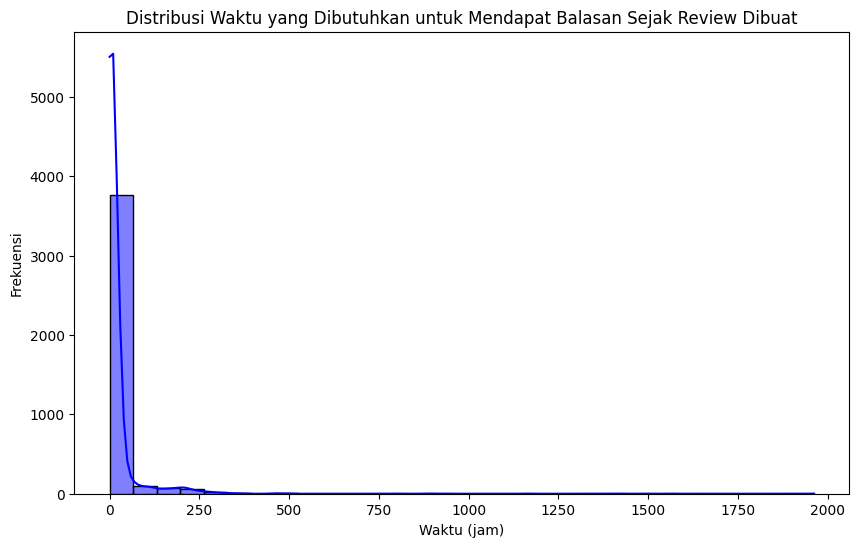

In [49]:
# Membuat visualisasi histogram tanpa menyertakan response_time_hours yang <= 0 (tanpa anomali)

# Filter data dengan response_time_hours > 0 dan bukan NaN
valid_response_time_data = dataframe[(dataframe['response_time_hours'] > 0) & (dataframe['response_time_hours'].notna())]

# Visualisasi distribusi
plt.figure(figsize=(10, 6))
sns.histplot(valid_response_time_data['response_time_hours'], kde=True, bins=30, color='blue')
plt.title('Distribusi Waktu yang Dibutuhkan untuk Mendapat Balasan Sejak Review Dibuat')
plt.xlabel('Waktu (jam)')
plt.ylabel('Frekuensi')
plt.show()

Data menceng (skew). Akan dilakukan imputasi dengan median

In [50]:
# Filter data dengan response_time_hours > 0 dan bukan NaN
valid_response_time_data = dataframe[(dataframe['response_time_hours'] > 0) & (dataframe['response_time_hours'].notna())]

# Filter data dengan waktu reply setelah waktu review
valid_data = valid_response_time_data[valid_response_time_data['reply_datetime'] > valid_response_time_data['review_datetime']]

# Menghitung median dari waktu balasan untuk data yang valid
median_response_time_hours = valid_data['response_time_hours'].median()
median_response_time = pd.Timedelta(hours=median_response_time_hours)

# Imputasi nilai NaN pada kolom reply_datetime dengan review_datetime + median_response_time
dataframe['reply_datetime'] = dataframe.apply(
    lambda row: row['review_datetime'] + median_response_time if pd.isna(row['reply_datetime']) else row['reply_datetime'],
    axis=1
)

# Menghitung ulang selisih waktu hanya untuk baris yang bukan anomali
dataframe.loc[dataframe['reply_datetime'] > dataframe['review_datetime'], 'response_time'] = dataframe['reply_datetime'] - dataframe['review_datetime']
dataframe.loc[dataframe['reply_datetime'] > dataframe['review_datetime'], 'response_time_hours'] = dataframe['response_time'].dt.total_seconds() / 3600

# Mengisi nilai NaN pada kolom reply_date dan reply_time berdasarkan reply_datetime
dataframe['reply_date'] = dataframe['reply_datetime'].dt.date
dataframe['reply_time'] = dataframe['reply_datetime'].dt.time

print(f"Missing values in reply_date: {dataframe['reply_date'].isnull().sum()}")
print(f"Missing values in reply_time: {dataframe['reply_time'].isnull().sum()}")

Missing values in reply_date: 0
Missing values in reply_time: 0


In [51]:
dataframe.isnull().mean() * 100

reviewer_name          0.0
content                0.0
score                  0.0
thumbsUpCount          0.0
sentiment              0.0
category               0.0
tags                   0.0
review_date            0.0
review_time            0.0
appVersion             0.0
replyContent           0.0
reply_date             0.0
reply_time             0.0
review_datetime        0.0
reply_datetime         0.0
response_time          0.0
response_time_hours    0.0
dtype: float64

Missing value sudah ditangani

##### Warning: Jika ingin melakukan analisis mengenai waktu respons, harap filtering dahulu agar hanya digunakan data dengan waktu review lebih dahulu dari waktu reply.

##### Menambah 1 Kolom: response_time_category

In [52]:
# Mengkategorikan waktu balasan
def categorize_response_time(row):
    hours = row['response_time_hours']
    if hours <= 0:
        return 'Updated Review'
    elif hours <= 24:
        return 'Quick'
    elif hours <= 72:
        return 'Moderate'
    else:
        return 'Slow'

# Menerapkan fungsi ke dataframe
dataframe['response_time_category'] = dataframe.apply(categorize_response_time, axis=1)



# Menghitung jumlah data untuk setiap jenis response_time_category
response_time_category_counts = dataframe['response_time_category'].value_counts()
# Mencetak jumlah data untuk setiap jenis response_time_category
print("Jumlah data untuk setiap jenis response_time_category:")
print(response_time_category_counts)

dataframe[['reviewer_name', 'response_time_hours', 'response_time_category']]

Jumlah data untuk setiap jenis response_time_category:
response_time_category
Quick             3630
Slow               236
Moderate           204
Updated Review     110
Name: count, dtype: int64


,reviewer_name,response_time_hours,response_time_category
0,gTk22ZjdaR8Y9GAn1Zm-,2.490000,Quick
1,gTk2Mq5Plg_bkc4AOdaq,5.255278,Quick
2,gTk2gkGjeHd1SMHZy2JR,10.201944,Quick
3,gTk24MO2t9HGH_4QoCCm,15.598333,Quick
4,gTk2aWCCbjijVSH5M77K,17.988056,Quick
...,...,...,...
4175,gTk2H0JzhcGmvSVidcBg,15.373889,Quick
4176,gTk2dEkq9jBQTRGhAU6K,16.402500,Quick
4177,gTk2dsxivx0DvebMHwSi,0.541944,Quick
4178,gTk2qHjR1VNKOTW5fgGI,1.040556,Quick


## Transformasi Variabel Nonnumerik: kolom 'tags'

### Ubah kolom 'tags' menjadi list

In [53]:
# Dapatkan nilai unik dari kolom tags
unique_tags = dataframe['tags'].unique()
# Urutkan berdasarkan jumlah karakter
sorted_tags = sorted(unique_tags, key=len, reverse=True)
# Cetak hasil
for tag in sorted_tags:
    print(tag)

["Aplikasi", "Spam", "Konten", "Koneksi", "Fitur", "Bug", "Harga", "Customer Service", "Login", "Keamanan", "Pengalaman Pengguna", "Uninstall", "Loading", "Download", "Video", "Notifikasi", "Materi", "Soal", "Pembelajaran"]
["Aplikasi", "Koneksi", "Fitur", "Bug", "Harga", "Customer Service", "Login", "Keamanan", "Pengalaman Pengguna", "Uninstall", "Loading", "Download", "Video", "Notifikasi", "Materi", "Soal", "Pembelajaran"]
["Aplikasi", "Koneksi", "Fitur", "Bug", "Harga", "Customer Service", "Keamanan", "Pengalaman Pengguna", "Uninstall", "Loading", "Download", "Video", "Notifikasi", "Materi", "Soal", "Pembelajaran"]
["Aplikasi", "Koneksi", "Fitur", "Bug", "Harga", "Customer Service", "Login", "Keamanan", "Pengalaman Pengguna", "Uninstall", "Download", "Video", "Notifikasi", "Materi", "Soal", "Pembelajaran"]
["Aplikasi", "Koneksi", "Bug", "Harga", "Customer Service", "Keamanan", "Pengalaman Pengguna", "Uninstall", "Loading", "Download", "Video", "Notifikasi", "Materi", "Soal", "Pembe

Yang perlu diperhatikan:
- pada beberapa baris terdapat '.' setelah ']', contoh: ["Aplikasi", "Pembelajaran"].
- []
[].
[ ]
[[]]
- Terdapat kata yang tidak dipisahkan oleh "". Contoh: [Download]

In [54]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Fungsi untuk preprocessing tags
def preprocess_tags(tag):
    # Menghapus simbol [ dan ] berlebih
    tag = tag.replace('[[]]', '[]')
    # Menghapus tanda kutip
    tag = tag.replace('"', '')
    # Menghapus spasi kosong antara kurung
    tag = tag.replace('[ ]', '[]')
    # Menghapus titik di akhir
    if tag.endswith('].'):
        tag = tag[:-1]
    # Memastikan setiap elemen diapit oleh tanda kutip
    if tag != '[]':
        tag = '[' + ','.join([f'"{item.strip()}"' for item in tag[1:-1].split(',')]) + ']'
    return tag

# Terapkan preprocessing
dataframe['tags'] = dataframe['tags'].apply(preprocess_tags)

# Evaluasi string menjadi daftar Python
dataframe['tags'] = dataframe['tags'].apply(lambda x: ast.literal_eval(x))

# Menggunakan MultiLabelBinarizer
mlb = MultiLabelBinarizer()
tags_mlb = mlb.fit_transform(dataframe['tags'])

# Hasil binerisasi
print(tags_mlb)

# Mendapatkan kembali label
tags = mlb.inverse_transform(tags_mlb)
print(tags)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[('Aplikasi', 'Customer Service', 'Koneksi', 'Login', 'Pengalaman Pengguna'), ('Aplikasi', 'Koneksi', 'Pembelajaran'), ('Pembelajaran',), (), ('Pembelajaran',), ('Aplikasi',), ('Aplikasi', 'Pembelajaran'), ('Download',), ('Koneksi',), ('Aplikasi',), ('Harga',), ('Promosi',), (), (), ('Aplikasi', 'Konten', 'Spam'), ('Aplikasi', 'Materi', 'Pembelajaran'), (), ('Pembelajaran',), ('Aplikasi',), ('Harga', 'Notifikasi', 'Pengalaman Pengguna', 'Spam'), ('Aplikasi', 'Spam'), (), ('Aplikasi',), (), ('Materi', 'Pembelajaran', 'Video'), ('Spam',), (), ('Aplikasi', 'Materi', 'Pembelajaran', 'Soal'), ('Aplikasi', 'Pembelajaran', 'Soal'), ('Bug', 'Koneksi'), ('Aplikasi', 'Fitur', 'Materi', 'Pembelajaran', 'Soal'), (), (), (), (), ('Koneksi', 'Spam'), ('Materi', 'Pembelajaran'), ('Aplikasi', 'Pembelajaran'), (), ('Aplikasi', 'Materi', 'Pembelajaran'), ('Aplikasi',), ('Jawaban', 'Pen

In [55]:
dataframe.head()

,reviewer_name,content,score,thumbsUpCount,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time,review_datetime,reply_datetime,response_time,response_time_hours,response_time_category
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[Aplikasi, Koneksi, Customer Service, Login, P...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25,2024-06-13 10:47:01,2024-06-13 13:16:25,0 days 02:29:24,2.490000,Quick
1,gTk2Mq5Plg_bkc4AOdaq,Sangat bagus untuk belajar ku setiap hari,5,0,Positive,Compliments,"[Aplikasi, Koneksi, Pembelajaran]",2024-06-13,07:58:40,6.79.1,Makasih ya Angel atas apresiasinya. Seneng ban...,2024-06-13,13:13:59,2024-06-13 07:58:40,2024-06-13 13:13:59,0 days 05:15:19,5.255278,Quick
2,gTk2gkGjeHd1SMHZy2JR,Sangat membantu menambah wawasa untuk belajar ...,5,0,Positive,Compliments,[Pembelajaran],2024-06-13,02:59:57,6.79.1,Makasih Herna udah kasih bintang 5. Kami senan...,2024-06-13,13:12:04,2024-06-13 02:59:57,2024-06-13 13:12:04,0 days 10:12:07,10.201944,Quick
3,gTk24MO2t9HGH_4QoCCm,👍👍👍👍👍👍👍👍👍,5,0,Positive,Compliments,[],2024-06-12,21:30:46,6.79.1,Thanks Ghea atas bintang 5-nya. Seneng deh Apl...,2024-06-13,13:06:40,2024-06-12 21:30:46,2024-06-13 13:06:40,0 days 15:35:54,15.598333,Quick
4,gTk2aWCCbjijVSH5M77K,"Sangat membantu dalam pembelajaran, recommeded",4,0,Positive,Compliments,[Pembelajaran],2024-06-12,19:04:55,6.79.1,Makasih Waode udah kasih kepercayaan ke Aplika...,2024-06-13,13:04:12,2024-06-12 19:04:55,2024-06-13 13:04:12,0 days 17:59:17,17.988056,Quick


### Penambahan Tags: Roboguru

In [56]:
dataframe[dataframe['content'].str.contains('robo guru')][['content', 'tags']]

,content,tags
475,Halo perkenalkan nama ku olinda awalnya aku ki...,"[Aplikasi, Koneksi, Pengalaman Pengguna, Unins..."
660,"Super duper kecewa dengan Ruang guru,sales adm...","[Aplikasi, Koneksi, Customer Service, Soal, Ma..."
1051,Assalamu'alaikum saya disini ingin menyampaika...,"[Fitur, Harga, Pembelajaran]"
2967,Saat menggunakan robo guru plus sistem eror da...,"[Aplikasi, Bug]"
4145,Mengapa saat saya ingin menyakn pertanyaan di ...,"[Pertanyaan, Forum, Robo Guru]"


#### Preprocessing 'Content'

In [57]:
def preprocess_text(text):
    # Normalisasi huruf menjadi huruf kecil
    text = text.lower()

    # Tambahkan spasi sebelum dan sesudah tanda baca
    text = re.sub(r'([.,!?()])', r' \1 ', text)

    # Ganti spasi ganda atau lebih dengan satu spasi
    text = re.sub(r'\s+', ' ', text)

    # Regex untuk mendeteksi emoji
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticon
        "\U0001F300-\U0001F5FF"  # Simbol & Piktogram
        "\U0001F680-\U0001F6FF"  # Transportasi & Simbol Tempat
        "\U0001F1E0-\U0001F1FF"  # Bendera
        "\U00002702-\U000027B0"  # Simbol Misc
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    # Tambahkan spasi sebelum dan sesudah emoji
    text = emoji_pattern.sub(r' \g<0> ', text)

    # Ganti spasi ganda atau lebih dengan satu spasi
    text = re.sub(r'\s+', ' ', text)

    # Hilangkan spasi di awal dan akhir teks
    return text.strip()


dataframe['cleaned_content'] = dataframe['content'].apply(preprocess_text)

In [58]:
all_text = ' '.join(dataframe['cleaned_content'].tolist())
    # Split the string into words and strip whitespace from each word
words = [word.strip() for word in all_text.split()]
unique_words = set(words)

#### Mengukur Kesamaan Kata

In [59]:
pip install Levenshtein

In [60]:
import Levenshtein

def word_similarity(word1, word2):
    # Menghitung jarak Levenshtein
    distance = Levenshtein.distance(word1, word2)

    # Menormalkan jarak untuk mendapatkan kesamaan (1 - jarak yang dinormalisasi)
    max_len = max(len(word1), len(word2))
    similarity = 1 - (distance / max_len)

    return similarity

# Kata target yang akan dibandingkan
target_word = "robo guru"

# Inisialisasi list untuk menyimpan hasil
results = []

# Loop melalui setiap kata unik
for word in unique_words:
    # Hitung kesamaan dengan kata target
    similarity = word_similarity(word, target_word)
    # Tambahkan hasil ke list
    results.append({"word": word, f"similarity_with_{target_word}": similarity})

# Konversi hasil ke DataFrame
similarity_df = pd.DataFrame(results)

# Set kolom 'word' sebagai indeks
similarity_df.set_index('word', inplace=True)

# Urutkan DataFrame berdasarkan nilai kesamaan dalam urutan menurun
similarity_df.sort_values(by=f"similarity_with_{target_word}", ascending=False, inplace=True)
similarity_df.head()

,similarity_with_robo guru
word,
roboguru,0.888889
robogurunya,0.636364
roboguruplus,0.583333
ruangguru,0.555556
rungguru,0.555556


#### Adding tags

In [61]:
# Fungsi untuk menambahkan tags jika keyword ditemukan menggunakan regex
def add_tags_if_keyword_present(row, keywords, tags_to_add):
    content = row['cleaned_content']
    tags = row['tags']

    # Cek setiap keyword dalam teks menggunakan regex untuk pencocokan tepat
    for keyword in keywords:
        if re.search(r'\b' + re.escape(keyword) + r'\b', content):
            for tag in tags_to_add:
                if tag not in tags:
                    tags.append(tag)
    return tags

In [62]:
# Menggabungkan semua tags ke dalam satu daftar
all_tags = [tag for sublist in dataframe['tags'] for tag in sublist]

# Mendapatkan tags yang unik
unique_tags = set(all_tags)

# Menampilkan tags yang unik
print(unique_tags)

{'Update', 'Gratis', 'Kuis', 'Nelpon', 'Konsultan', 'Pembelajaran', 'Spam', 'Pelajaran', 'Loading', 'Delay', 'Robo Guru', 'Server Error', 'Mengecewakan', 'Bonus', 'Fitur', 'Developer', 'Materi', 'Bimbel', 'Uang', 'Bimbel online', 'Web', 'Badmood', 'Server', 'Bagus', 'Slow respon', 'Close', 'Tugas', 'Paket', 'Bantu', 'Coding', 'Pencarian', 'Ganti', 'Pembuat', 'Seru', 'Bintang', 'Notifikasi', 'Verifikasi', 'Pujian', 'Install', 'Rumah', 'Bugs', 'Kecepatan', 'APK', 'Lama', 'Akun', 'Login', 'Mata Pelajaran', 'Mudah Dipahami', 'Kursus', 'Wi-Fi', 'Forum', 'Bug', 'Hewan', 'Soal', 'SMA', 'Crash', 'Prestasi', 'Sertifikat', 'Refund', 'Langganan', 'Promosi', 'Bahasa Indonesia', 'Customer Service', 'Sejarah', 'Pancasila', 'Error', 'Uninstall', 'Pertanyaan', 'Screenshot', 'Keamanan', 'IPS', 'Gratisan', 'Siswa', 'Pelayanan', 'Respon', 'Animasi', 'Session', 'Kode', 'Rank', 'Drilling Soal', 'Manfaat', 'Video', 'Informatika', 'Bimbingan', 'Pelajar', 'Upgrade', 'Email', 'Pilihan Jawaban', 'Membantu', 'Ap

In [63]:
# Daftar keyword yang akan dicari
keywords = ["roboguru", "robo guru", "robogurunya", "roboguruplus"]

# Tags yang akan ditambahkan jika keyword ditemukan
tags_to_add = ["feature", "robo guru"]

# Terapkan fungsi ke setiap baris
dataframe['tags'] = dataframe.apply(lambda row: add_tags_if_keyword_present(row, keywords, tags_to_add), axis=1)

dataframe[dataframe['content'].str.contains('robo guru')][['content', 'tags']]

,content,tags
475,Halo perkenalkan nama ku olinda awalnya aku ki...,"[Aplikasi, Koneksi, Pengalaman Pengguna, Unins..."
660,"Super duper kecewa dengan Ruang guru,sales adm...","[Aplikasi, Koneksi, Customer Service, Soal, Ma..."
1051,Assalamu'alaikum saya disini ingin menyampaika...,"[Fitur, Harga, Pembelajaran, feature, robo guru]"
2967,Saat menggunakan robo guru plus sistem eror da...,"[Aplikasi, Bug, feature, robo guru]"
4145,Mengapa saat saya ingin menyakn pertanyaan di ...,"[Pertanyaan, Forum, Robo Guru, feature, robo g..."


#### Feature Engineering dari tags: 4 kolom baru

In [64]:
# Definisikan kategori dan tags yang termasuk dalam masing-masing kategori
kategori_tags = {
    "Masalah Teknis": [
        'Masalah', 'Bugs', 'Loading', 'Koneksi', 'Crash', 'Error', 'Eror', 'Lemot', 'Server Error', 'Spam'
    ],
    "Fitur Aplikasi": [
        'Fitur', 'feature', 'Robo', 'Guru', 'robo guru', 'Aplikasi', 'Kelas', 'Pembayaran', 'Premium', 'Langganan', 'Notifikasi'
    ],
    "Konten Pembelajaran": [
        'Pembelajaran', 'Pelajaran', 'Materi', 'Tryout', 'Quiz', 'Kurikulum', 'Video', 'Animasi', 'Pembahasan', 'Konten', 'Mata Pelajaran', 'Penjelasan'
    ],
    "Pembayaran dan Harga": [
        'Pembayaran', 'Langganan', 'Refund', 'Harga', 'Promo', 'Diskon', 'Cashback', 'Paket Belajar'
    ],
    "Antarmuka Pengguna": [
        'Tampilan', 'Desain', 'UI', 'UX', 'Navigasi', 'User Interface', 'User Experience', 'Animasi'
    ],
    "Lainnya": [
        'Keren', 'Bagus', 'Kualitas', 'Komentar', 'Rekomendasi', 'Pujian', 'Makasih', 'Harga', 'Bonus', 'Hadiah'
    ]
}

# Fungsi untuk mengecek apakah tags dalam suatu baris termasuk dalam kategori tertentu
def check_category(tags, category_tags):
    for tag in tags:
        for category, tags_list in category_tags.items():
            if tag in tags_list:
                return category
    return None

# Tambahkan kolom baru untuk setiap kategori
for category in kategori_tags.keys():
    dataframe[category] = dataframe['tags'].apply(lambda tags: any(tag in kategori_tags[category] for tag in tags))

### Missing Value Kolom Tags

In [65]:
empty_tags_count = dataframe['tags'].apply(lambda x: x == []).sum()
total_rows = len(dataframe)
percentage_missing = (empty_tags_count / total_rows) * 100

print(f"Number of rows with empty tags: {empty_tags_count}")
print(f"Percentage of rows with empty tags: {percentage_missing:.2f}%")

Number of rows with empty tags: 1096
Percentage of rows with empty tags: 26.22%


# Download Dataframe

In [66]:
# Mengonversi kolom reply_date menjadi datetime
dataframe['reply_date'] = pd.to_datetime(dataframe['reply_date'], format='%Y-%m-%d')

# Memastikan kolom review_date juga dalam format datetime, meskipun sudah disebutkan bahwa kolom ini sudah dalam format datetime64[ns]
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'], format='%Y-%m-%d')

# Verifikasi perubahan tipe data
print(dataframe.dtypes)

reviewer_name                      object
content                            object
score                               int64
thumbsUpCount                       int64
sentiment                          object
category                           object
tags                               object
review_date                datetime64[ns]
review_time                        object
appVersion                         object
replyContent                       object
reply_date                 datetime64[ns]
reply_time                         object
review_datetime            datetime64[ns]
reply_datetime             datetime64[ns]
response_time             timedelta64[ns]
response_time_hours               float64
response_time_category             object
cleaned_content                    object
Masalah Teknis                       bool
Fitur Aplikasi                       bool
Konten Pembelajaran                  bool
Pembayaran dan Harga                 bool
Antarmuka Pengguna                

In [67]:
dataframe.head()

,reviewer_name,content,score,thumbsUpCount,sentiment,category,tags,review_date,review_time,appVersion,replyContent,reply_date,reply_time,review_datetime,reply_datetime,response_time,response_time_hours,response_time_category,cleaned_content,Masalah Teknis,Fitur Aplikasi,Konten Pembelajaran,Pembayaran dan Harga,Antarmuka Pengguna,Lainnya
0,gTk22ZjdaR8Y9GAn1Zm-,Keren,5,0,Positive,Compliments,"[Aplikasi, Koneksi, Customer Service, Login, P...",2024-06-13,10:47:01,6.79.1,Thank you ya Marlia buat feedback yang diberik...,2024-06-13,13:16:25,2024-06-13 10:47:01,2024-06-13 13:16:25,0 days 02:29:24,2.490000,Quick,keren,True,True,False,False,False,False
1,gTk2Mq5Plg_bkc4AOdaq,Sangat bagus untuk belajar ku setiap hari,5,0,Positive,Compliments,"[Aplikasi, Koneksi, Pembelajaran]",2024-06-13,07:58:40,6.79.1,Makasih ya Angel atas apresiasinya. Seneng ban...,2024-06-13,13:13:59,2024-06-13 07:58:40,2024-06-13 13:13:59,0 days 05:15:19,5.255278,Quick,sangat bagus untuk belajar ku setiap hari,True,True,True,False,False,False
2,gTk2gkGjeHd1SMHZy2JR,Sangat membantu menambah wawasa untuk belajar ...,5,0,Positive,Compliments,[Pembelajaran],2024-06-13,02:59:57,6.79.1,Makasih Herna udah kasih bintang 5. Kami senan...,2024-06-13,13:12:04,2024-06-13 02:59:57,2024-06-13 13:12:04,0 days 10:12:07,10.201944,Quick,sangat membantu menambah wawasa untuk belajar ...,False,False,True,False,False,False
3,gTk24MO2t9HGH_4QoCCm,👍👍👍👍👍👍👍👍👍,5,0,Positive,Compliments,[],2024-06-12,21:30:46,6.79.1,Thanks Ghea atas bintang 5-nya. Seneng deh Apl...,2024-06-13,13:06:40,2024-06-12 21:30:46,2024-06-13 13:06:40,0 days 15:35:54,15.598333,Quick,👍👍👍👍👍👍👍👍👍,False,False,False,False,False,False
4,gTk2aWCCbjijVSH5M77K,"Sangat membantu dalam pembelajaran, recommeded",4,0,Positive,Compliments,[Pembelajaran],2024-06-12,19:04:55,6.79.1,Makasih Waode udah kasih kepercayaan ke Aplika...,2024-06-13,13:04:12,2024-06-12 19:04:55,2024-06-13 13:04:12,0 days 17:59:17,17.988056,Quick,"sangat membantu dalam pembelajaran , recommeded",False,False,True,False,False,False


In [68]:
# Simpan dataframe sebagai file Excel
file_path = 'ruangguru_cleaned.xlsx'
dataframe.to_excel(file_path, index=False)

# Tampilkan tautan unduhan untuk file Excel
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
# Simpan dataframe sebagai file CSV
file_path = 'ruangguru_cleaned.csv'
dataframe.to_csv(file_path, index=False)

# Tampilkan tautan unduhan untuk file CSV
from google.colab import files
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# *Exploratory Data Analysis*

In [36]:
# Atur opsi pandas untuk menampilkan semua teks dalam kolom 'content'
pd.set_option('display.max_colwidth', None)

In [ ]:
# Mengubah kolom review_date ke format datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# Menambahkan kolom untuk tahun dan bulan
dataframe['year_month'] = dataframe['review_date'].dt.to_period('M')

### Topik yang sering dibahas oleh pengguna: Frekuensi Tags

Dengan informasi dari tags

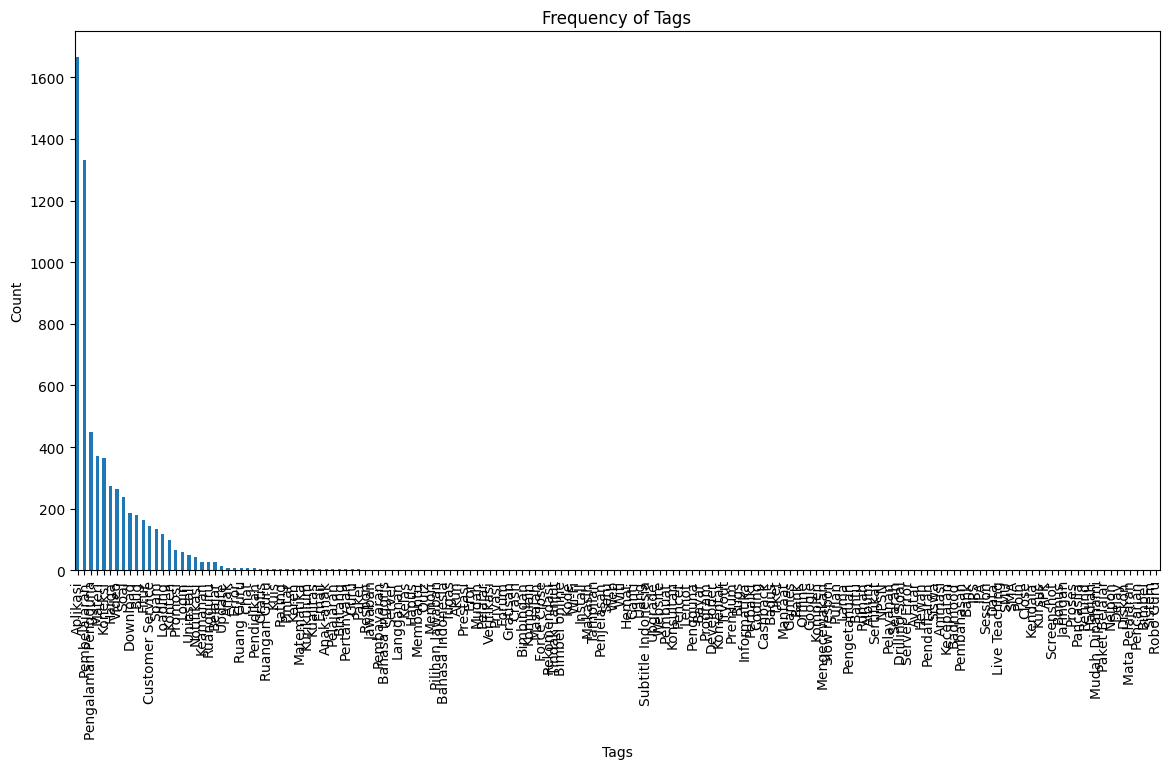

In [ ]:
# Visualisasi frekuensi tags
# Membuat dataframe baru dengan exploded tags dan mereset index
df_exploded = dataframe.explode('tags').reset_index(drop=True)

plt.figure(figsize=(14, 7))
df_exploded['tags'].value_counts().plot(kind='bar')
plt.title('Frequency of Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

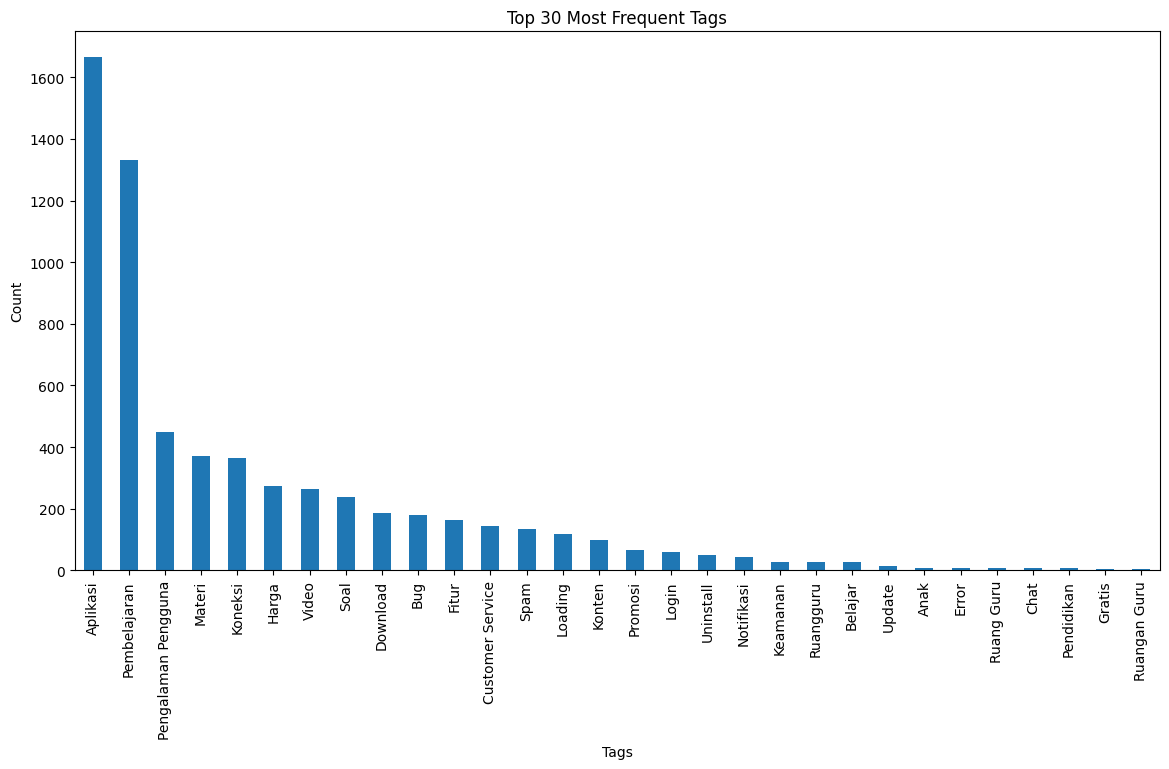

In [ ]:
plt.figure(figsize=(14, 7))
df_exploded['tags'].value_counts().nlargest(30).plot(kind='bar')
plt.title('Top 30 Most Frequent Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Layanan yang secara konsisten menerima penilaian lebih tinggi: Tags dan Avg Score

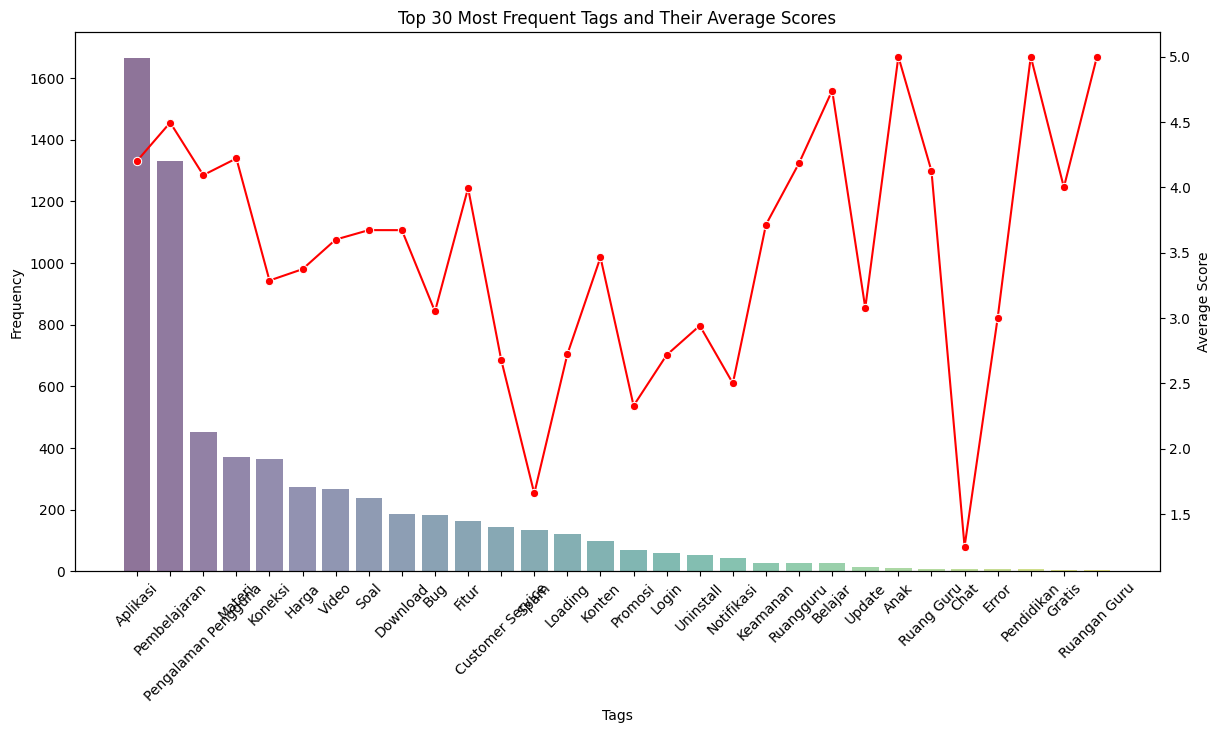

In [ ]:
# Group by tags untuk mendapatkan frekuensi dan skor rata-rata
tag_stats = df_exploded.groupby('tags').agg(
    frequency=('tags', 'size'),
    avg_score=('score', 'mean')
).sort_values(by='frequency', ascending=False)

# Mendapatkan 30 tags yang paling sering muncul
top_20_tags = tag_stats.head(30)

# Plotting 30 tags yang paling sering muncul beserta skor rata-rata mereka
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot untuk frekuensi
sns.barplot(x=top_20_tags.index, y=top_20_tags['frequency'], ax=ax1, palette='viridis', alpha=0.6)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Tags')
ax1.set_title('Top 30 Most Frequent Tags and Their Average Scores')
ax1.tick_params(axis='x', rotation=45)

# Line plot untuk skor rata-rata
ax2 = ax1.twinx()
sns.lineplot(x=top_20_tags.index, y=top_20_tags['avg_score'], ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Score')

plt.show()

In [ ]:
import pandas as pd

# Membuat dataframe baru dengan exploded tags
df_exploded = dataframe.explode('tags')

# Hitung frekuensi dan rata-rata skor untuk setiap tag
tag_stats = df_exploded.groupby('tags').agg(
    frequency=('tags', 'size'),
    avg_score=('score', 'mean')
).reset_index()

# Ambil 20 tags dengan frekuensi terbesar
top_20_freq = tag_stats.sort_values(by='frequency', ascending=False).head(30)

# Filter dataframe untuk tags yang ada dalam top 20 frekuensi
top_20_freq_tags = top_20_freq['tags'].tolist()
filtered_df = tag_stats[tag_stats['tags'].isin(top_20_freq_tags)]

# Ambil 20 tags dengan skor rata-rata terkecil dari filtered dataframe
top_20_avg_score = filtered_df.sort_values(by='avg_score', ascending=True)

# Tampilkan tabel berdasarkan frekuensi
print("Tabel 1: Top 30 Tags by Frequency")
print(top_20_freq)

# Tampilkan tabel berdasarkan skor rata-rata
print("Tabel 2: Top 30 Tags by Average Score (from the top 30 most frequent tags)")
print(top_20_avg_score)

Tabel 1: Top 30 Tags by Frequency
                    tags  frequency  avg_score
6               Aplikasi       1666   4.202281
103         Pembelajaran       1332   4.495495
109  Pengalaman Pengguna        450   4.093333
85                Materi        371   4.221024
67               Koneksi        363   3.286501
49                 Harga        273   3.373626
161                Video        265   3.600000
148                 Soal        238   3.672269
33              Download        186   3.672043
21                   Bug        181   3.049724
38                 Fitur        164   3.993902
28      Customer Service        144   2.680556
149                 Spam        134   1.656716
78               Loading        119   2.722689
69                Konten         97   3.463918
122              Promosi         67   2.328358
79                 Login         60   2.716667
157            Uninstall         51   2.941176
93            Notifikasi         44   2.500000
58              Keamanan  

In [ ]:
# Menampilkan isi review dari beberapa kategori dengan avg score terendah (dari the top 30 tags) dengan sentimen negatif
# Kategori yang ingin ditampilkan
categories = ['Chat', 'Spam', 'Promosi', 'Notifikasi', 'Customer Service', 'Aplikasi', 'Loading', 'Login', 'Uninstall']

# Filter dan tampilkan untuk setiap kategori
for category in categories:
    filtered_category = dataframe[(dataframe['tags'].apply(lambda x: category in x)) & (dataframe['sentiment'] == 'Negative')]
    print(f"Kategori: {category}")
    print(filtered_category[['content']])
    print("\n")


Kategori: Chat
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 content
82                                                                                                                                                                                                                                                                                                                           Waktunya belajar, ga bisa masuk, admin di chat slowrespon, alasannya banyak balasin chat, lah emang admin nya cuma 1? Hangus, disuru beli paket lagi, dih kepake juga belum
1700   

### Sentimen yang paling umum diekspresikan oleh pengguna: Frekuensi Sentimen

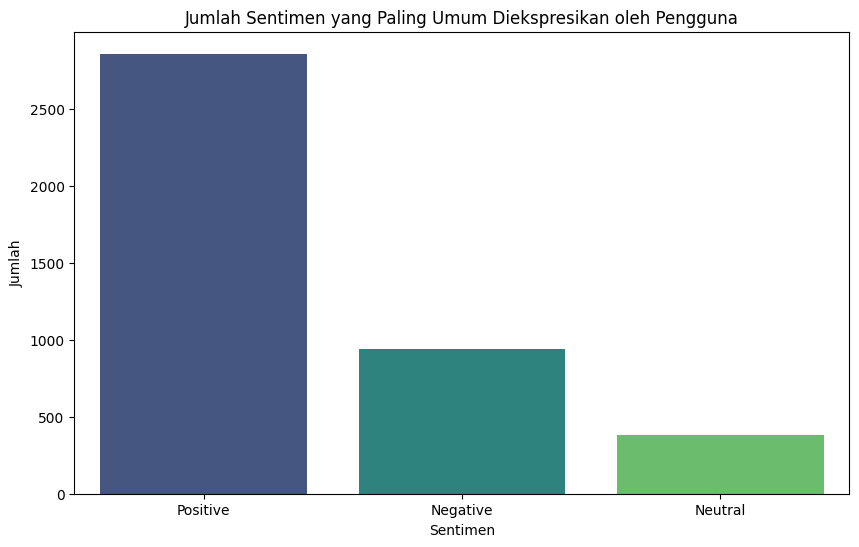

In [ ]:
# Menghitung jumlah setiap sentimen
sentiment_count = dataframe['sentiment'].value_counts()

# Visualisasi barchart
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='viridis')
plt.title('Jumlah Sentimen yang Paling Umum Diekspresikan oleh Pengguna')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

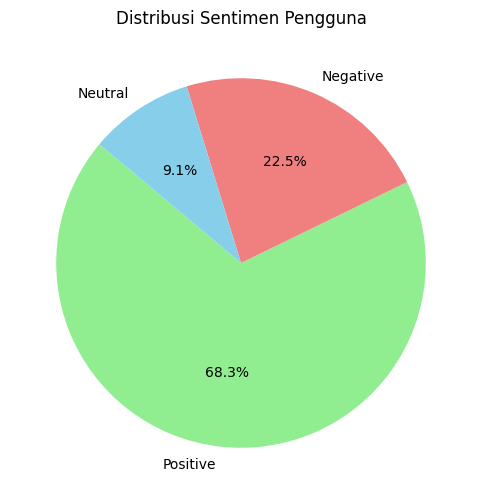

In [ ]:
# Menghitung jumlah sentimen
sentiment_count = dataframe['sentiment'].value_counts()

# Visualisasi
plt.figure(figsize=(8, 6))
sentiment_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral','skyblue'])
plt.title('Distribusi Sentimen Pengguna')
plt.ylabel('')
plt.show()

### Aspek tertentu dari pengalaman pengguna yang menerima umpan balik positif atau negatif: Sentimen vs Tags

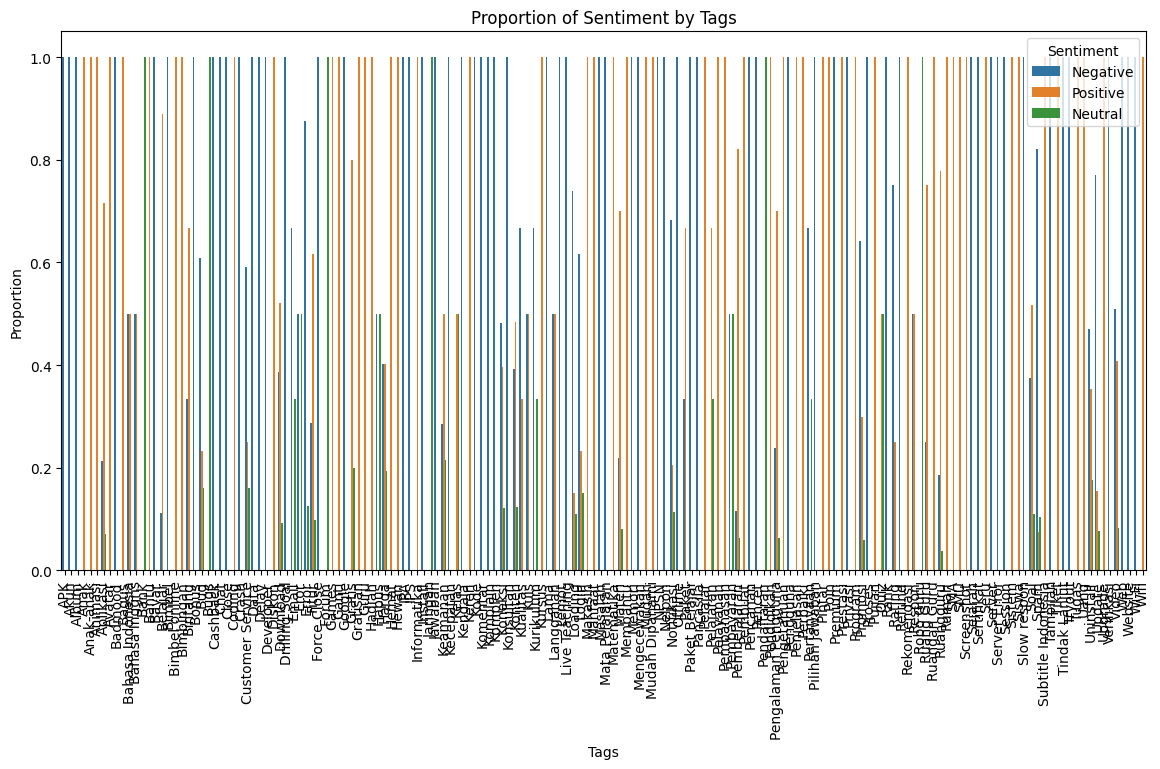

In [ ]:
tag_sentiment = df_exploded.groupby('tags')['sentiment'].value_counts(normalize=True).reset_index(name='proportion')
plt.figure(figsize=(14, 7))
sns.barplot(data=tag_sentiment, x='tags', y='proportion', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Proportion of Sentiment by Tags')
plt.xlabel('Tags')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

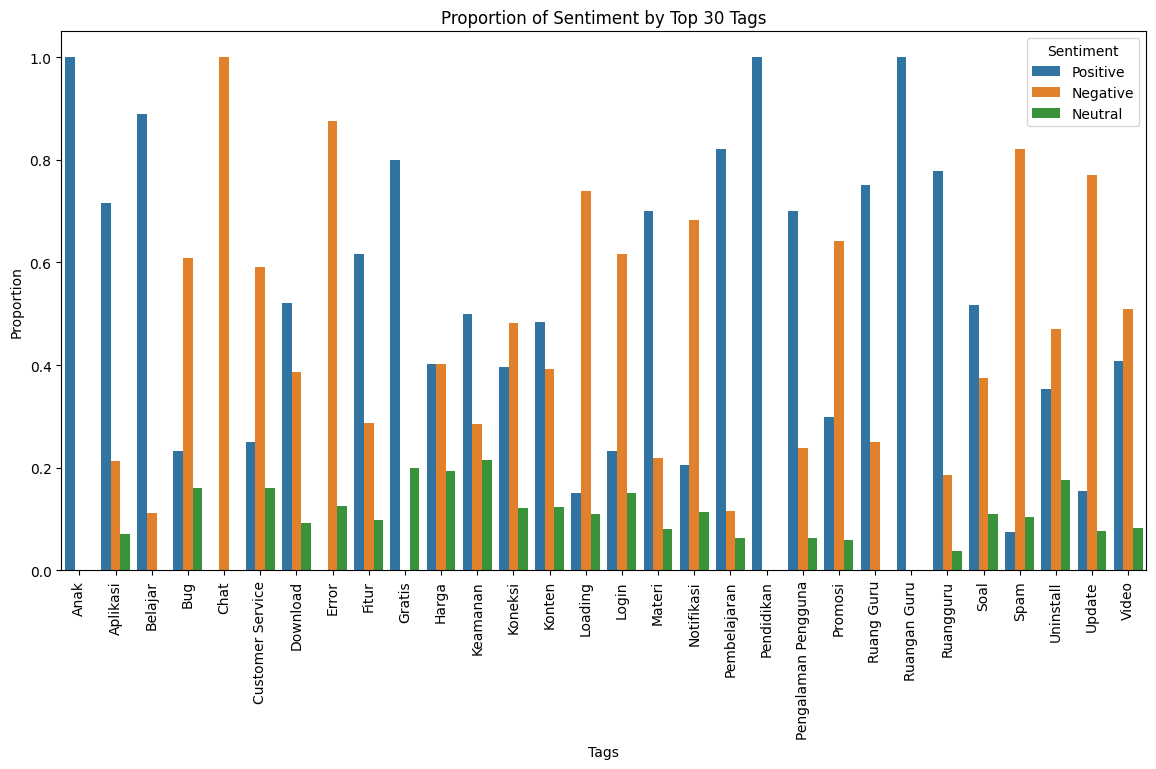

In [ ]:
top_tags = df_exploded['tags'].value_counts().nlargest(30).index
tag_sentiment = df_exploded[df_exploded['tags'].isin(top_tags)].groupby('tags')['sentiment'].value_counts(normalize=True).reset_index(name='proportion')
plt.figure(figsize=(14, 7))
sns.barplot(data=tag_sentiment, x='tags', y='proportion', hue='sentiment')
plt.xticks(rotation=90)
plt.title('Proportion of Sentiment by Top 30 Tags')
plt.xlabel('Tags')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()

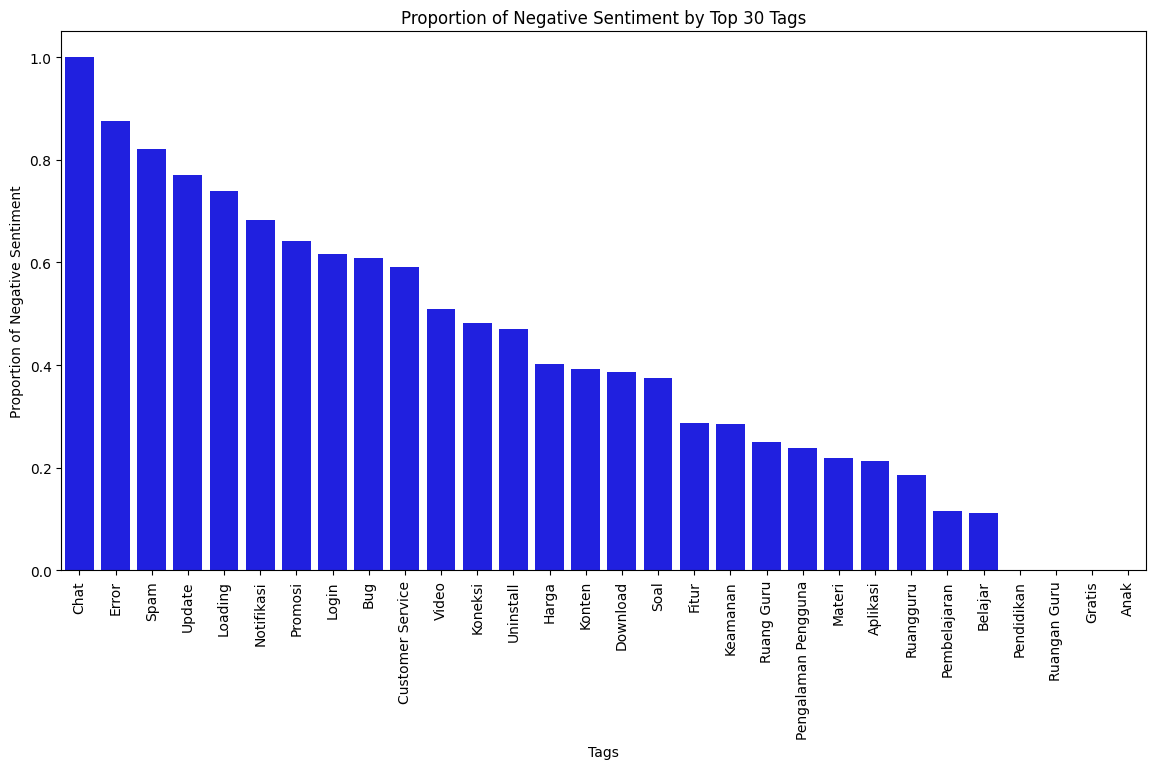

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter untuk top 30 tags berdasarkan frekuensi
top_tags = df_exploded['tags'].value_counts().nlargest(30).index

# Filter data berdasarkan top 30 tags
tag_sentiment = df_exploded[df_exploded['tags'].isin(top_tags)]

# Hitung proporsi sentiment untuk setiap tag
tag_sentiment = tag_sentiment.groupby(['tags', 'sentiment']).size().unstack(fill_value=0)
tag_sentiment['proportion_negative'] = tag_sentiment['Negative'] / tag_sentiment.sum(axis=1)
tag_sentiment = tag_sentiment.sort_values(by='proportion_negative', ascending=False).reset_index()

# Plot barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=tag_sentiment, x='tags', y='proportion_negative', color='blue')
plt.xticks(rotation=90)
plt.title('Proportion of Negative Sentiment by Top 30 Tags')
plt.xlabel('Tags')
plt.ylabel('Proportion of Negative Sentiment')
plt.show()


In [ ]:
# Menampilkan isi review dari beberapa kategori dengan proporsi sentimen negatif (dari the top 30 tags) dengan sentimen negatif
# Kategori yang ingin ditampilkan
categories = ["Error", "Bug", "Video", "Koneksi", "Harga", "Konten", "Download", "Soal"]

# Filter dan tampilkan untuk setiap kategori
for category in categories:
    filtered_category = dataframe[(dataframe['tags'].apply(lambda x: category in x)) & (dataframe['sentiment'] == 'Negative')]
    print(f"Kategori: {category}")
    print(filtered_category[['content']])
    print("\n")


Kategori: Error
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              content
389                                                                                                                                                                                                                                                                                                                                                                                                                                                                  BAGUSS CMN SAYANG ERROR KAK H

#### Topik: Bug

In [ ]:
# Memilih baris dengan tags 'Bug'
bug_indices = dataframe['tags'].apply(lambda x: 'Bug' in x)
bug_data = dataframe.loc[bug_indices]

# Menggunakan MultiLabelBinarizer
mlb_bug = MultiLabelBinarizer()
tags_mlb_bug = mlb_bug.fit_transform(bug_data['tags'])

# Membuat dataframe frekuensi
tags_freq_bug = pd.DataFrame(tags_mlb_bug, columns=mlb_bug.classes_, index=bug_data.index)

# Menghitung frekuensi antara 'Bug' dengan tags lainnya
bug_with_other_tags_freq = tags_freq_bug.drop(columns='Bug').sum().sort_values(ascending=False)

# Menampilkan hasil tabel frekuensi antara tags Bug dengan tags lainnya
print("Tabel frekuensi antara tags 'Bug' dengan tags lainnya:")
print(bug_with_other_tags_freq.to_string())

Tabel frekuensi antara tags 'Bug' dengan tags lainnya:
Aplikasi               90
Koneksi                49
Harga                  35
Video                  35
Pembelajaran           33
Pengalaman Pengguna    32
Customer Service       24
Materi                 23
Soal                   23
Loading                23
Fitur                  22
Download               17
Login                  16
Notifikasi             15
Uninstall              15
Keamanan               12
Konten                  5
Spam                    3
Promosi                 3
Update                  2
Slow respon             1
Premium                 1
Ruang Guru              1
Mengecewakan            1
Poin                    1
Pertanyaan              1
Drilling Soal           1
Perbaiki                1


### Bagaimana skor dan sentimen pengguna pada suatu versi aplikasi?
Versi Aplikasi vs. Skor dan Sentimen

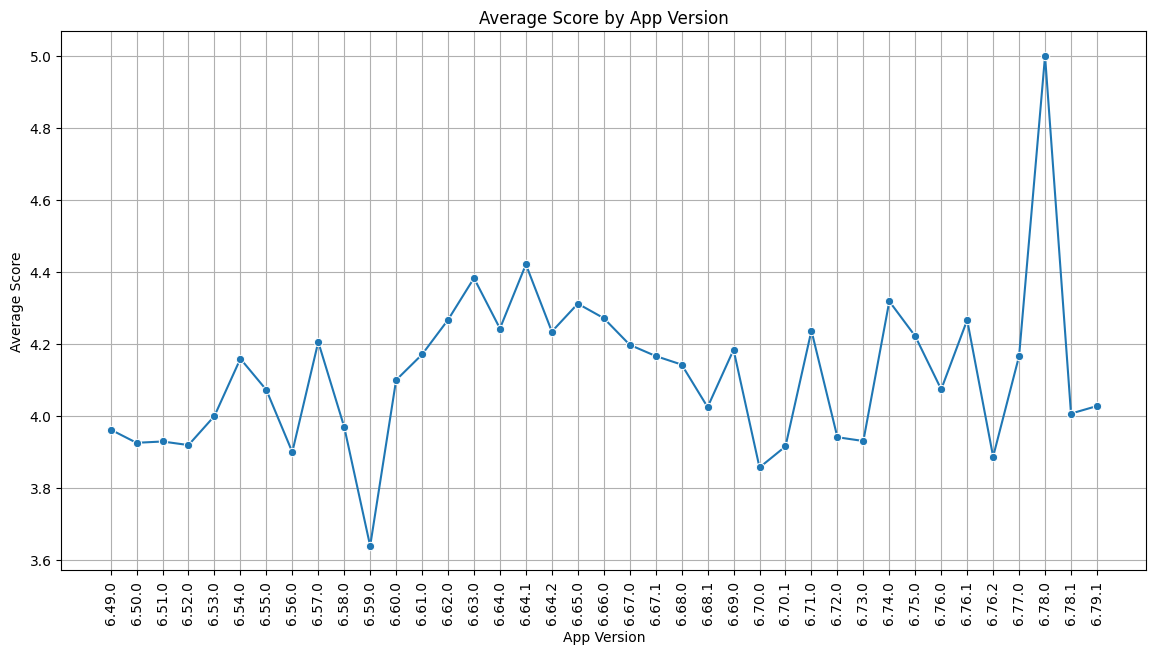

In [ ]:
# Menghitung rata-rata skor berdasarkan versi aplikasi
avg_score_by_version = dataframe.groupby('appVersion')['score'].mean().reset_index()

# Mengurutkan berdasarkan versi aplikasi
avg_score_by_version = avg_score_by_version.sort_values(by='appVersion')

# Plot line chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_score_by_version, x='appVersion', y='score', marker='o')
plt.xticks(rotation=90)
plt.title('Average Score by App Version')
plt.xlabel('App Version')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

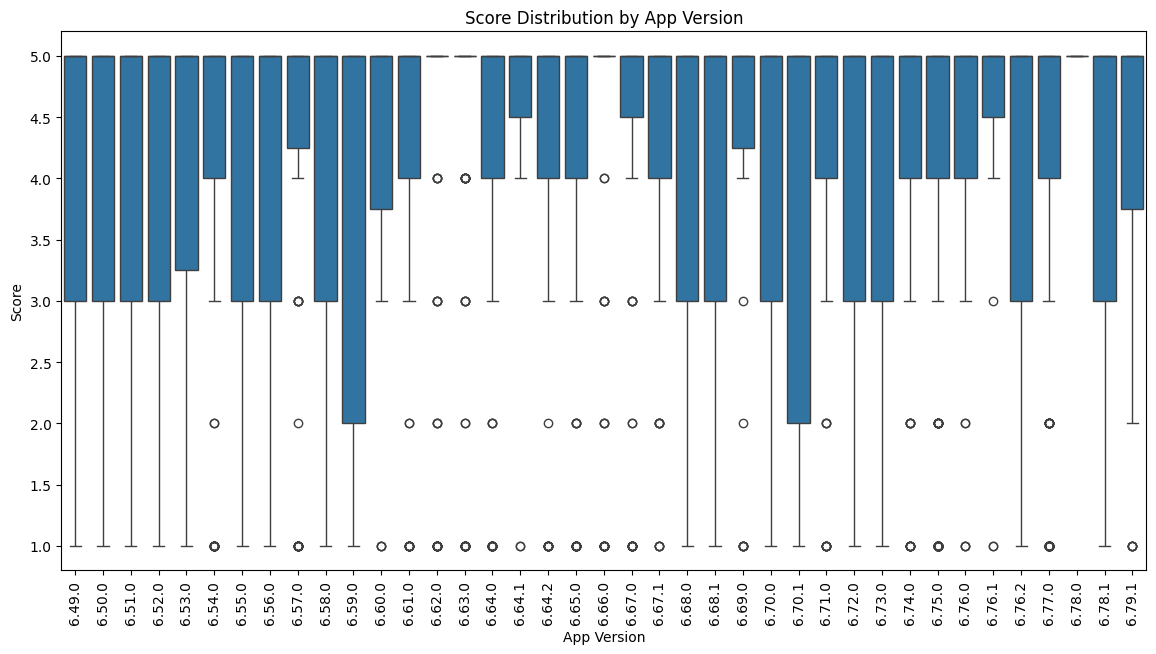

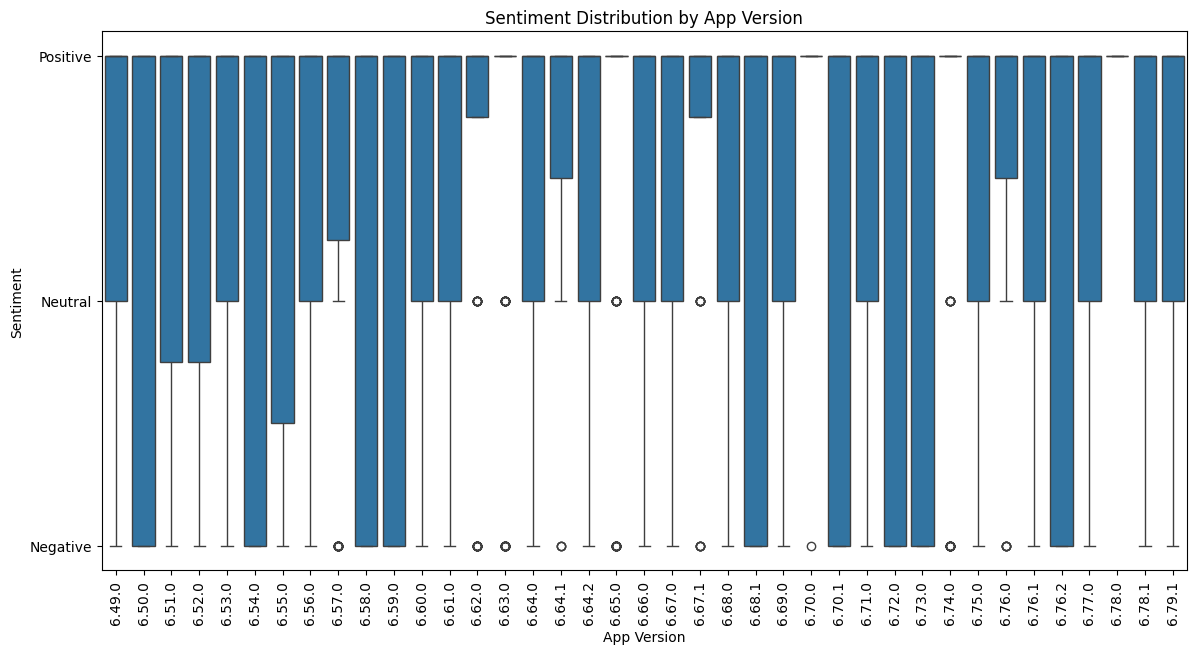

In [ ]:
# Visualisasi versi aplikasi vs skor
plt.figure(figsize=(14, 7))
sns.boxplot(data=dataframe, x='appVersion', y='score', order=sorted(dataframe['appVersion'].unique()))
plt.xticks(rotation=90)
plt.title('Score Distribution by App Version')
plt.xlabel('App Version')
plt.ylabel('Score')
plt.show()

# Visualisasi versi aplikasi vs sentimen
plt.figure(figsize=(14, 7))
sns.boxplot(data=dataframe, x='appVersion', y='sentiment', order=sorted(dataframe['appVersion'].unique()))
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by App Version')
plt.xlabel('App Version')
plt.ylabel('Sentiment')
plt.show()

### Pada waktu kapan review banyak di-post? Review Date and Time Trends (Review Volume dan Hour)

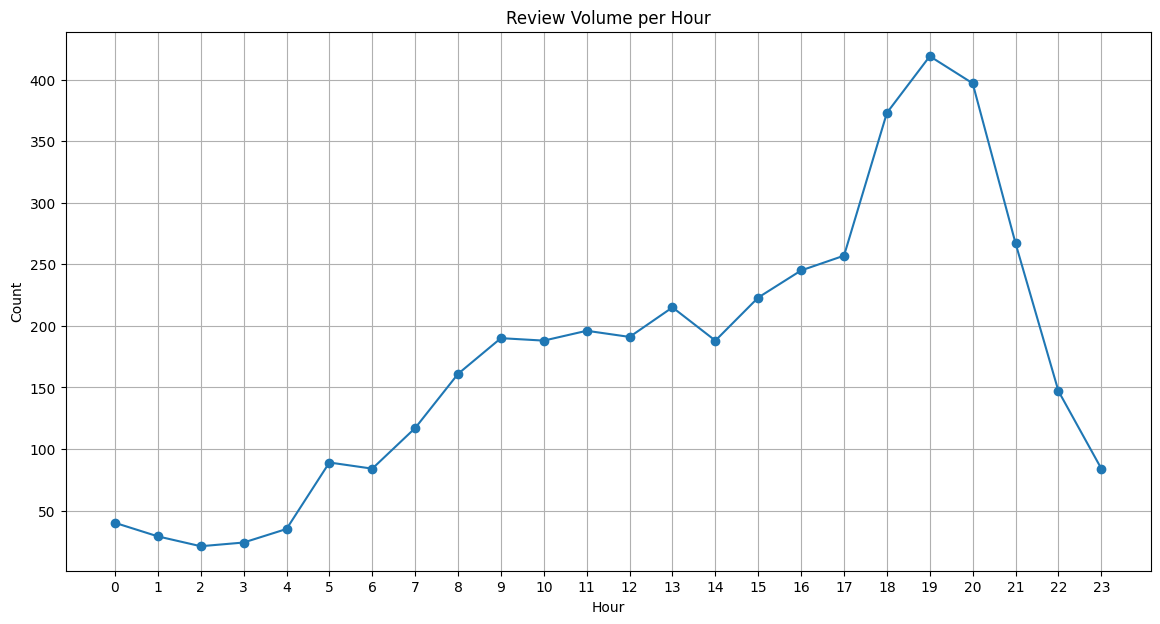

In [ ]:
# JAM

# Misalkan dataframe sudah ada dan kolom review_time sudah dalam format datetime
dataframe['review_time'] = pd.to_datetime(dataframe['review_time'], format='%H:%M:%S')

# Menambahkan kolom bulan dan jam
dataframe['review_month'] = dataframe['review_date'].dt.month
dataframe['review_hour'] = dataframe['review_time'].dt.hour

# Visualisasi volume review per jam sebagai line chart
plt.figure(figsize=(14, 7))
dataframe['review_hour'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Review Volume per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(range(0, 24))  # Menambahkan titik-titik untuk setiap jam
plt.show()

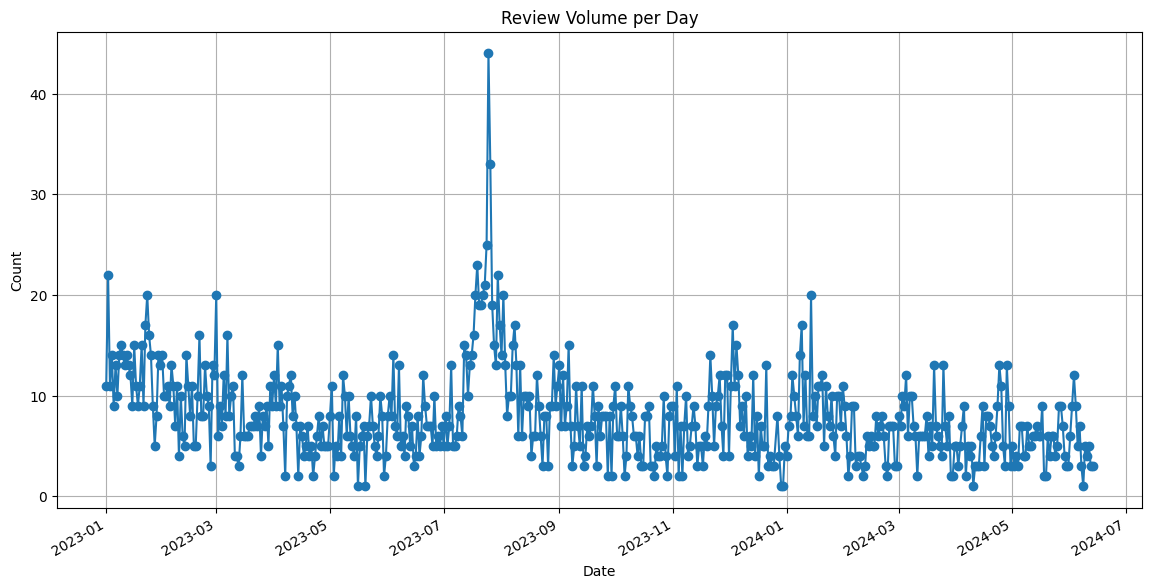

In [ ]:
# HARI

# Misalkan dataframe sudah ada dan kolom review_date sudah dalam format datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# Menghitung jumlah review per hari
reviews_per_day = dataframe['review_date'].value_counts().sort_index()

# Visualisasi volume review per hari sebagai line chart
plt.figure(figsize=(14, 7))
reviews_per_day.plot(kind='line', marker='o')
plt.title('Review Volume per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

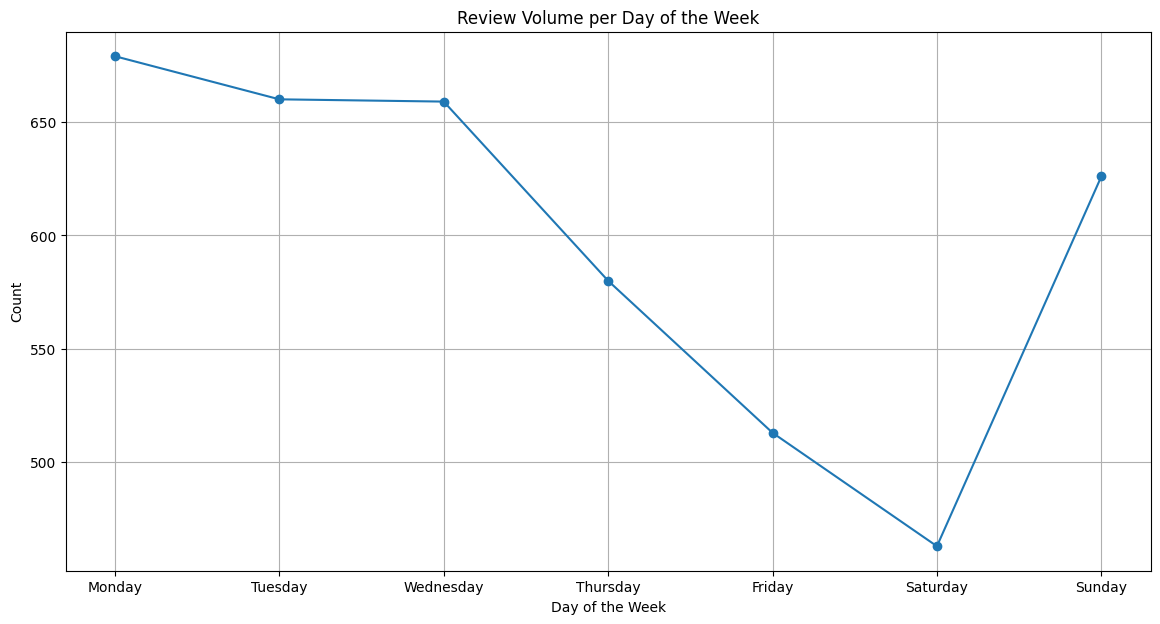

In [ ]:
# HARI

# Misalkan dataframe sudah ada dan kolom review_date sudah dalam format datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# Menambahkan kolom hari dalam minggu
dataframe['review_day_of_week'] = dataframe['review_date'].dt.day_name()

# Menghitung jumlah review per hari dalam minggu
reviews_per_day_of_week = dataframe['review_day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Visualisasi volume review per hari dalam minggu sebagai line chart
plt.figure(figsize=(14, 7))
reviews_per_day_of_week.plot(kind='line', marker='o')
plt.title('Review Volume per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.grid(True)
plt.show()


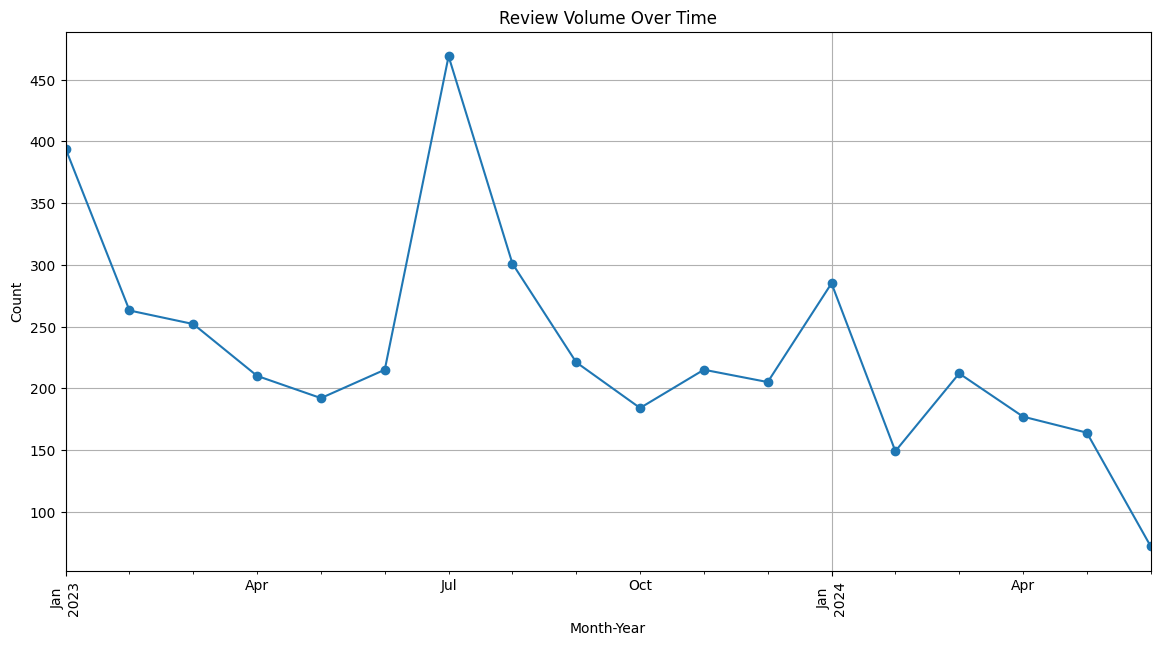

In [ ]:
# BULAN

# Misalkan dataframe sudah ada dan kolom review_date sudah dalam format datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# Menambahkan kolom bulan-tahun
dataframe['review_month_year'] = dataframe['review_date'].dt.to_period('M')

# Menghitung jumlah review per bulan-tahun
reviews_per_month_year = dataframe['review_month_year'].value_counts().sort_index()

# Visualisasi volume review dari waktu ke waktu sebagai line chart dengan marker
plt.figure(figsize=(14, 7))
reviews_per_month_year.plot(kind='line', marker='o')
plt.title('Review Volume Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


##

### Pada periode atau musim kapan dengan tingkat kepuasan lebih tinggi atau rendah?

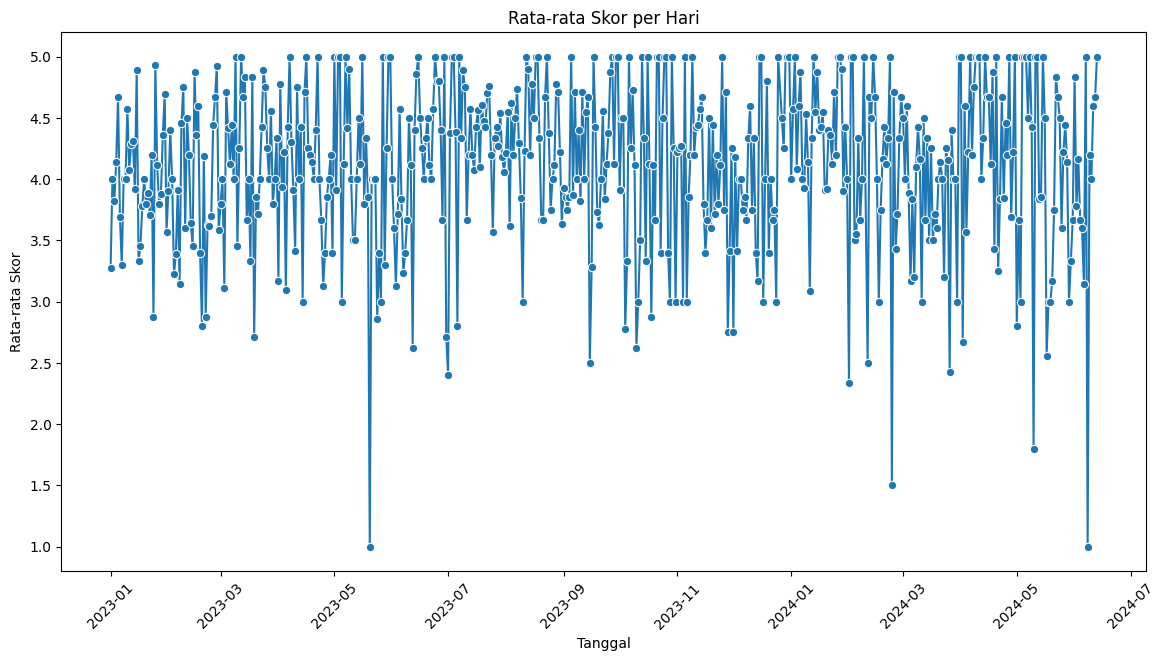

In [ ]:
# HARI

# Ubah kolom review_date ke format datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# Tambahkan kolom untuk tanggal
dataframe['date'] = dataframe['review_date'].dt.date

# Hitung rata-rata skor per hari
avg_score_by_day = dataframe.groupby('date')['score'].mean().reset_index()

# Konversi kembali ke datetime untuk plotting
avg_score_by_day['date'] = pd.to_datetime(avg_score_by_day['date'])

# Visualisasi
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_score_by_day, x='date', y='score', marker='o')
plt.title('Rata-rata Skor per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Skor')
plt.xticks(rotation=45)
plt.show()


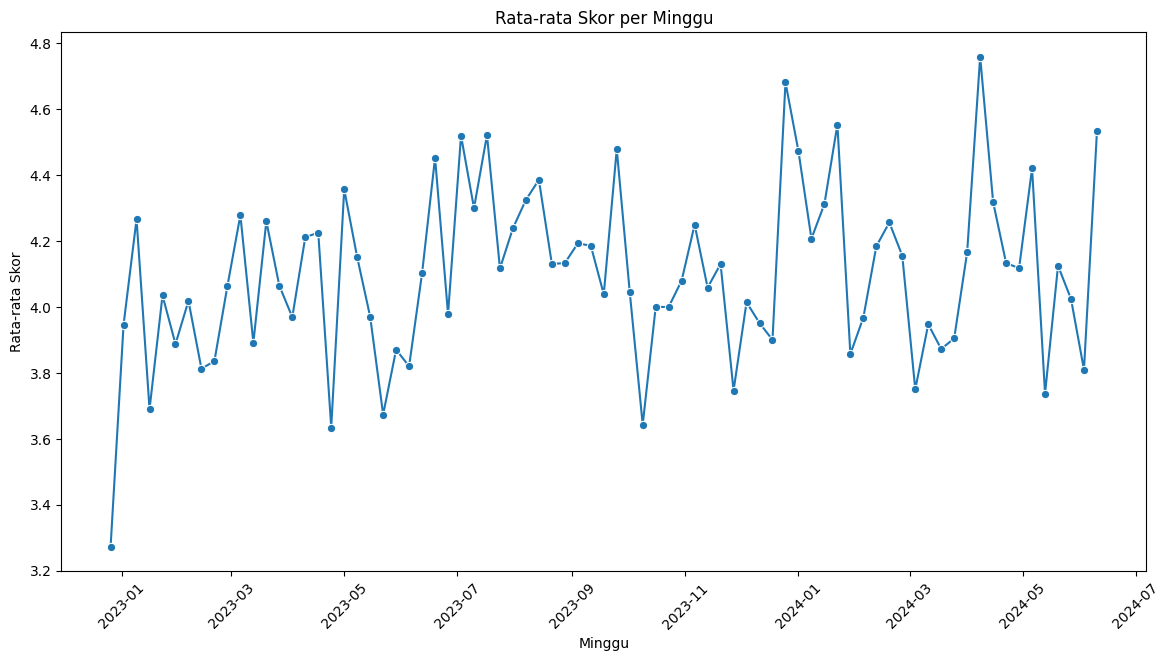

In [ ]:
# MINGGU

# Ubah kolom review_date ke format datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# Tambahkan kolom untuk minggu
dataframe['year_week'] = dataframe['review_date'].dt.to_period('W').apply(lambda r: r.start_time)

# Hitung rata-rata skor per minggu
avg_score_by_week = dataframe.groupby('year_week')['score'].mean().reset_index()

# Konversi kembali ke datetime untuk plotting
avg_score_by_week['year_week'] = pd.to_datetime(avg_score_by_week['year_week'])

# Visualisasi
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_score_by_week, x='year_week', y='score', marker='o')
plt.title('Rata-rata Skor per Minggu')
plt.xlabel('Minggu')
plt.ylabel('Rata-rata Skor')
plt.xticks(rotation=45)
plt.show()

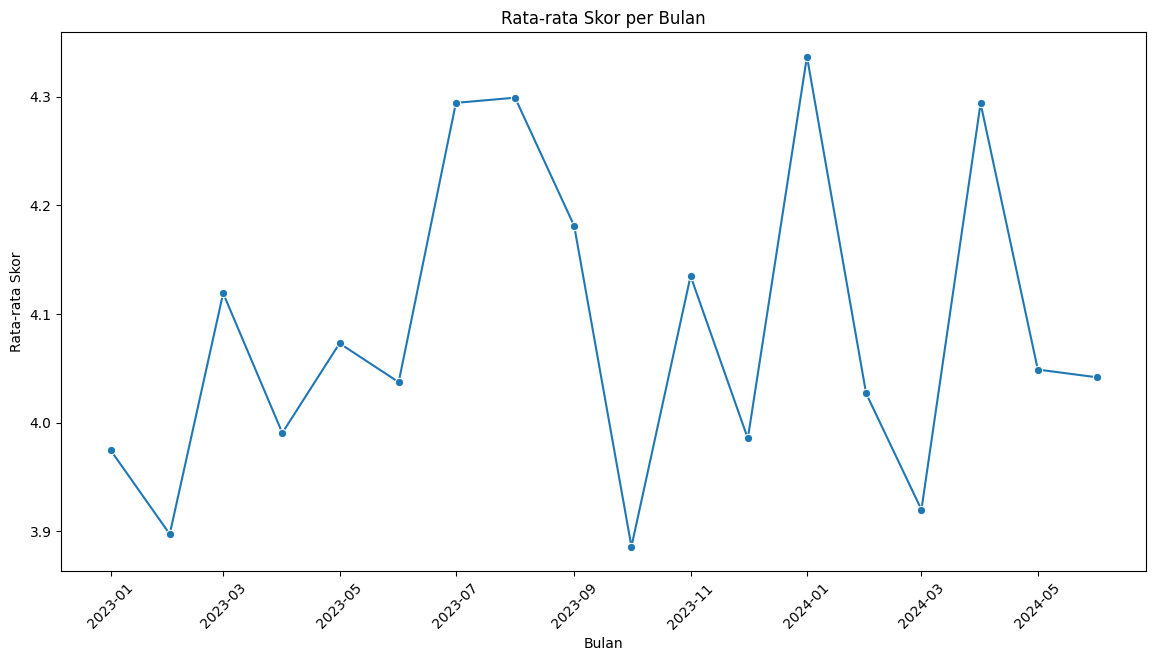

In [ ]:
# BULAN

# Mengubah kolom review_date ke format datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# Menambahkan kolom untuk tahun dan bulan
dataframe['year_month'] = dataframe['review_date'].dt.to_period('M')

# Menghitung rata-rata skor per bulan
avg_score_by_month = dataframe.groupby('year_month')['score'].mean().reset_index()

# Konversi kembali ke datetime untuk plotting
avg_score_by_month['year_month'] = avg_score_by_month['year_month'].dt.to_timestamp()

# Visualisasi
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_score_by_month, x='year_month', y='score', marker='o')
plt.title('Rata-rata Skor per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Skor')
plt.xticks(rotation=45)
plt.show()

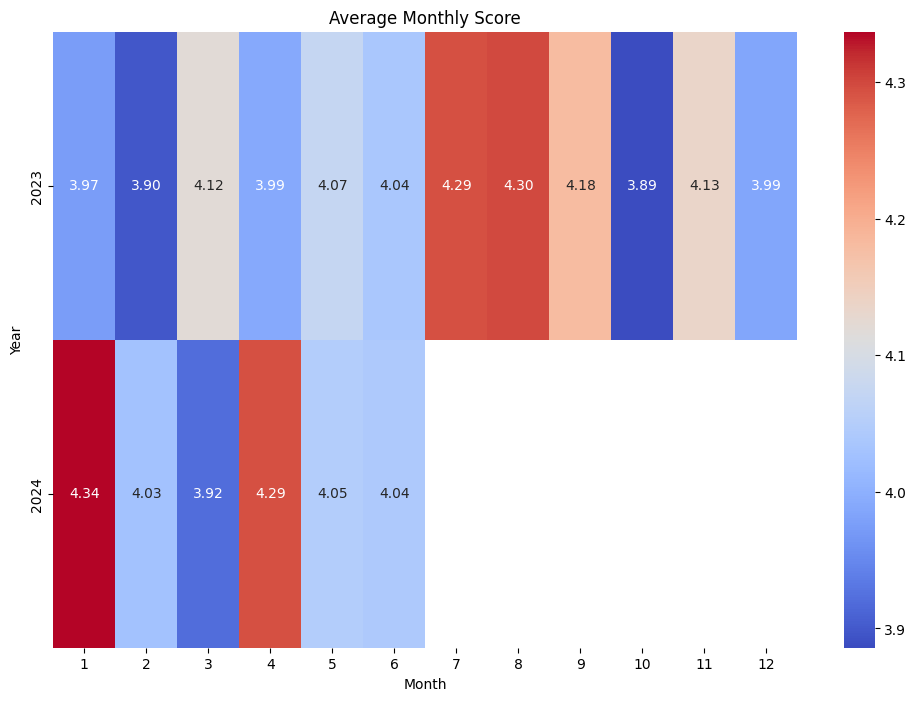

In [ ]:
# BULAN

# Pastikan kolom review_date adalah tipe datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# Ekstrak bulan dan tahun tanpa menambahkan kolom baru ke dataframe
monthly_scores = dataframe.groupby([dataframe['review_date'].dt.year, dataframe['review_date'].dt.month])['score'].mean().unstack()

# Visualisasi rata-rata skor bulanan
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_scores, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Monthly Score')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

### Bagaimana kategori (pujian, komplain, dll.) yang sering muncul dari review pengguna? Popular Categories and Tags

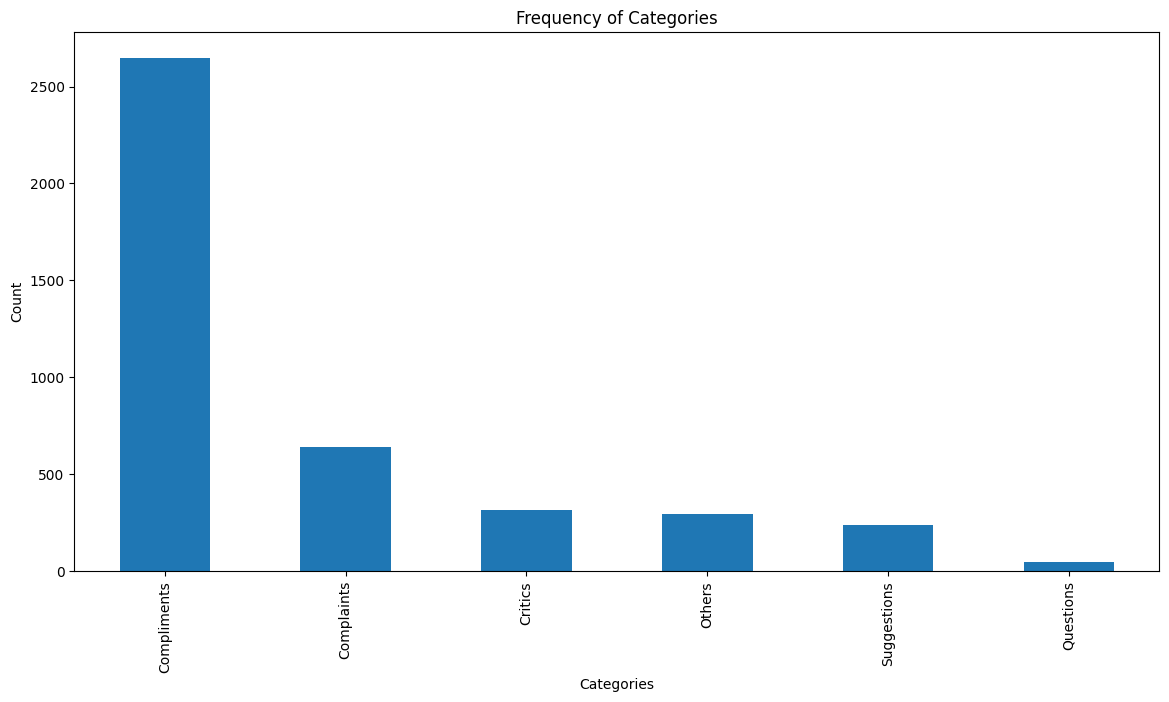

In [ ]:
# Visualisasi frekuensi kategori
plt.figure(figsize=(14, 7))
dataframe['category'].value_counts().plot(kind='bar')
plt.title('Frequency of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()